In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
train=pd.read_csv("Fertilizer Prediction.csv")

In [58]:
train.head()

Temparature  Humidity  Moisture Soil_Type  Crop_Type  Nitrogen  Potassium  \
0           26        52        38     Sandy      Maize        37          0   
1           29        52        45     Loamy  Sugarcane        12          0   
2           34        65        62     Black     Cotton         7          9   
3           32        62        34       Red    Tobacco        22          0   
4           28        54        46    Clayey      Paddy        35          0   

   Phosphorous Fertilizer_Name  
0            0            Urea  
1           36             DAP  
2           30        14-35-14  
3           20           28-28  
4            0            Urea

In [59]:
train.shape

(99, 9)

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil_Type        99 non-null     object
 4   Crop_Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer_Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


# LABLES

In [61]:
train['Fertilizer_Name'].value_counts()

Fertilizer_Name
Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
17-17-17     7
10-26-26     7
Name: count, dtype: int64

# EDA

### NULL VALUE

In [62]:
train.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil_Type          0
Crop_Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer_Name    0
dtype: int64

### DUPLICATES

In [63]:
train.duplicated().sum()

0

In [64]:
cor=train.corr(numeric_only=True)

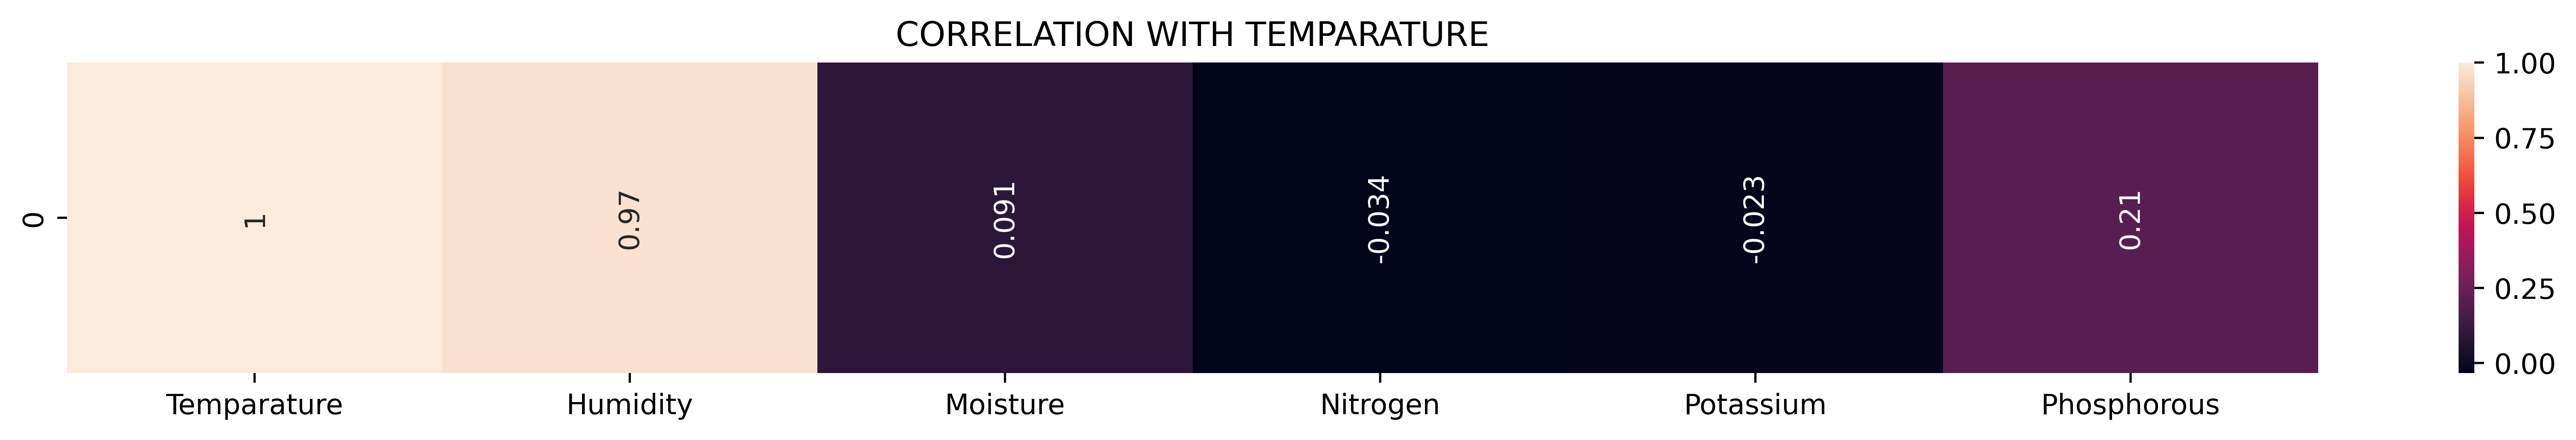

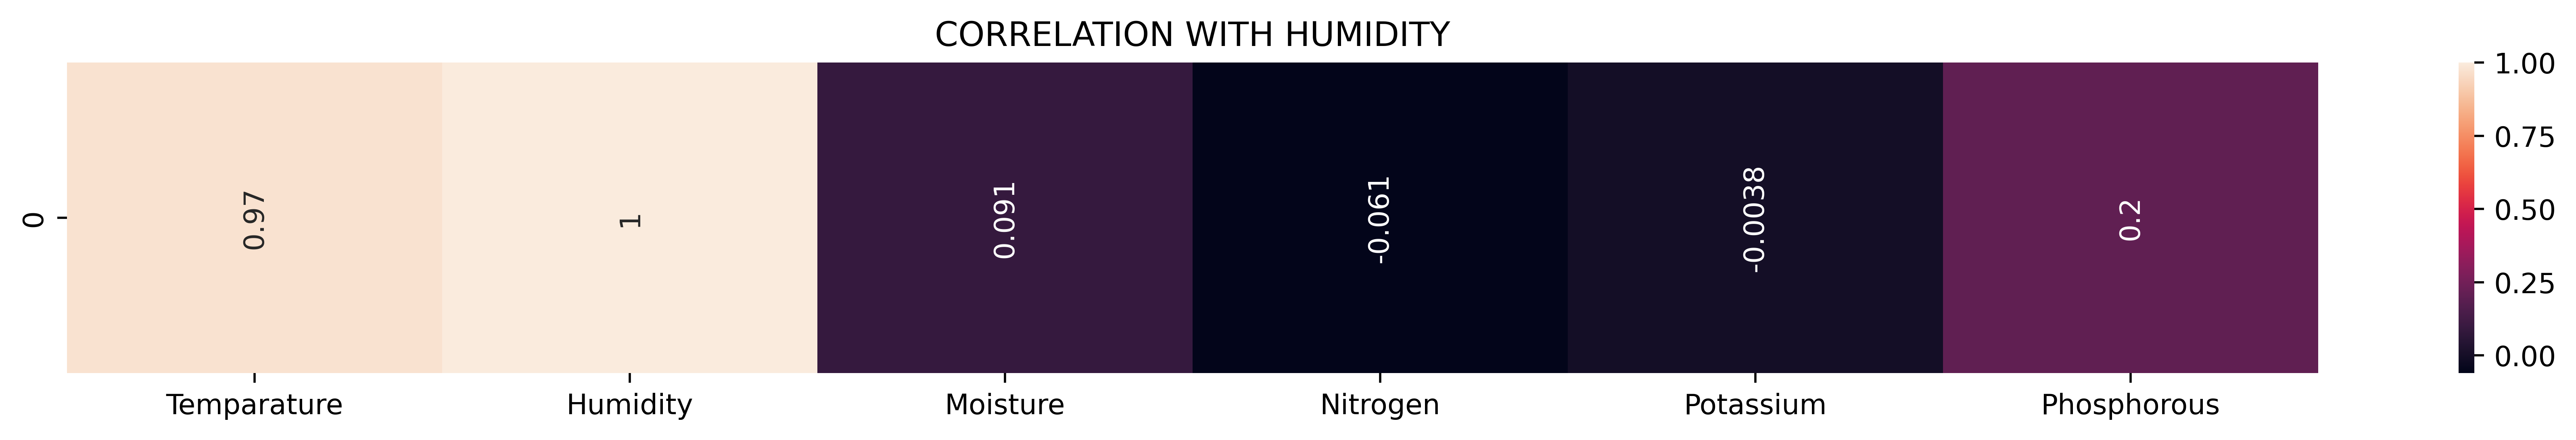

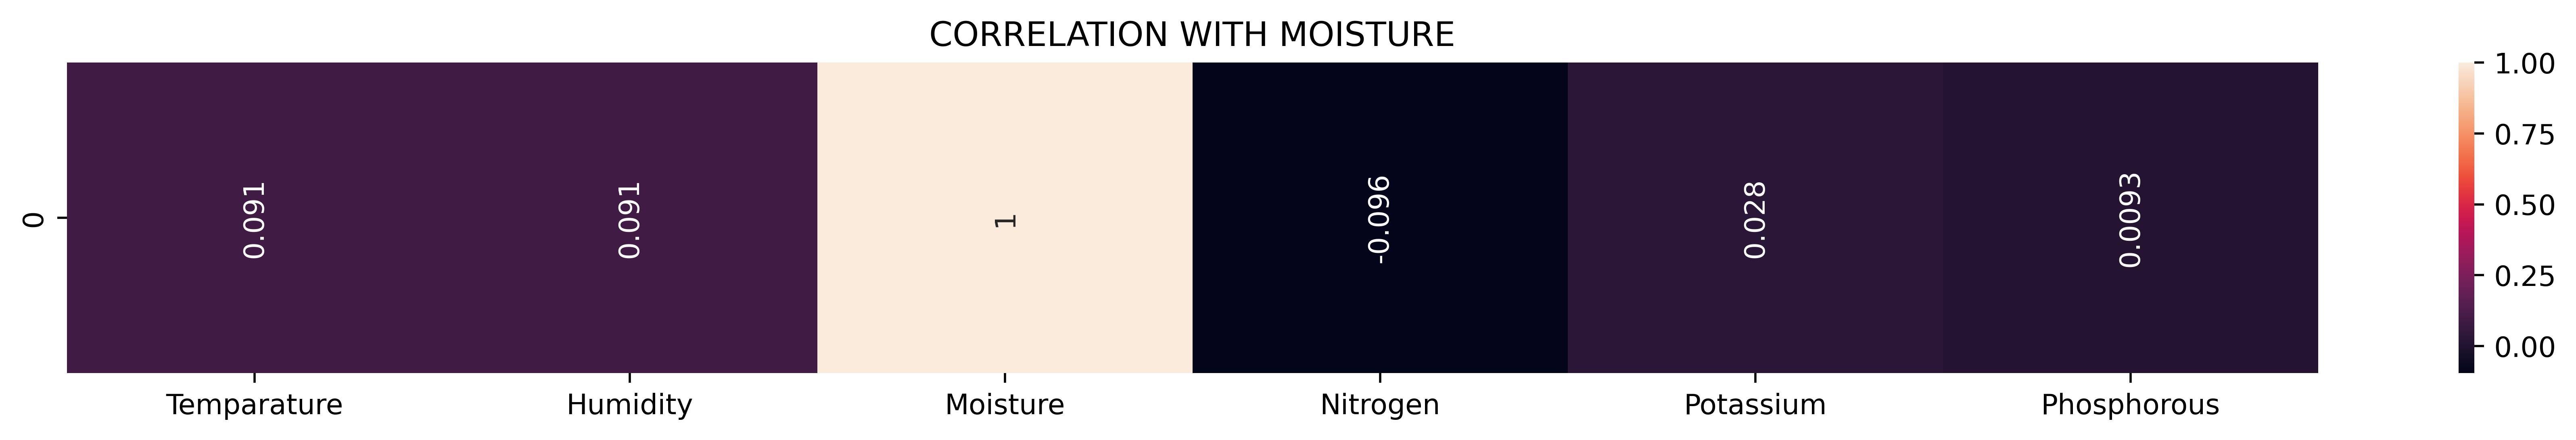

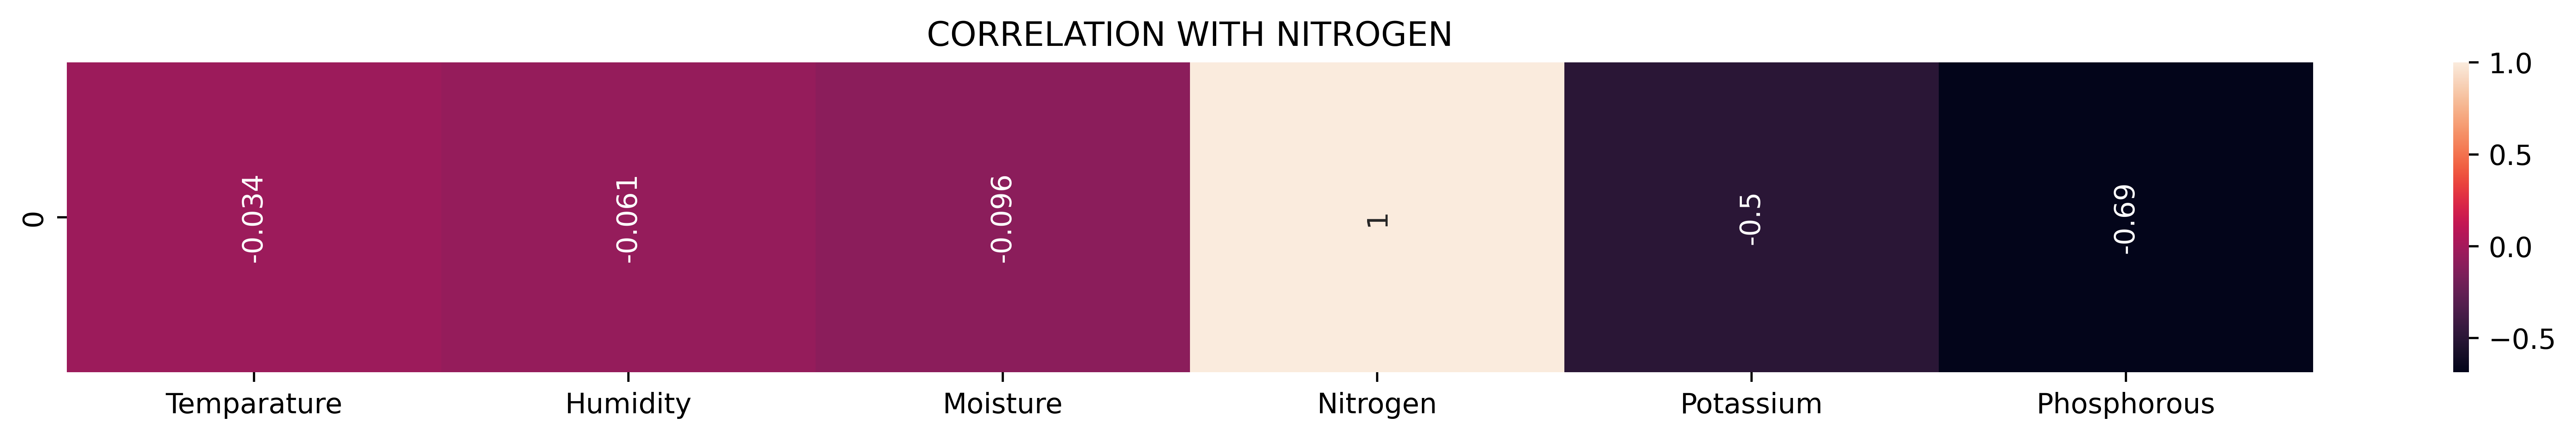

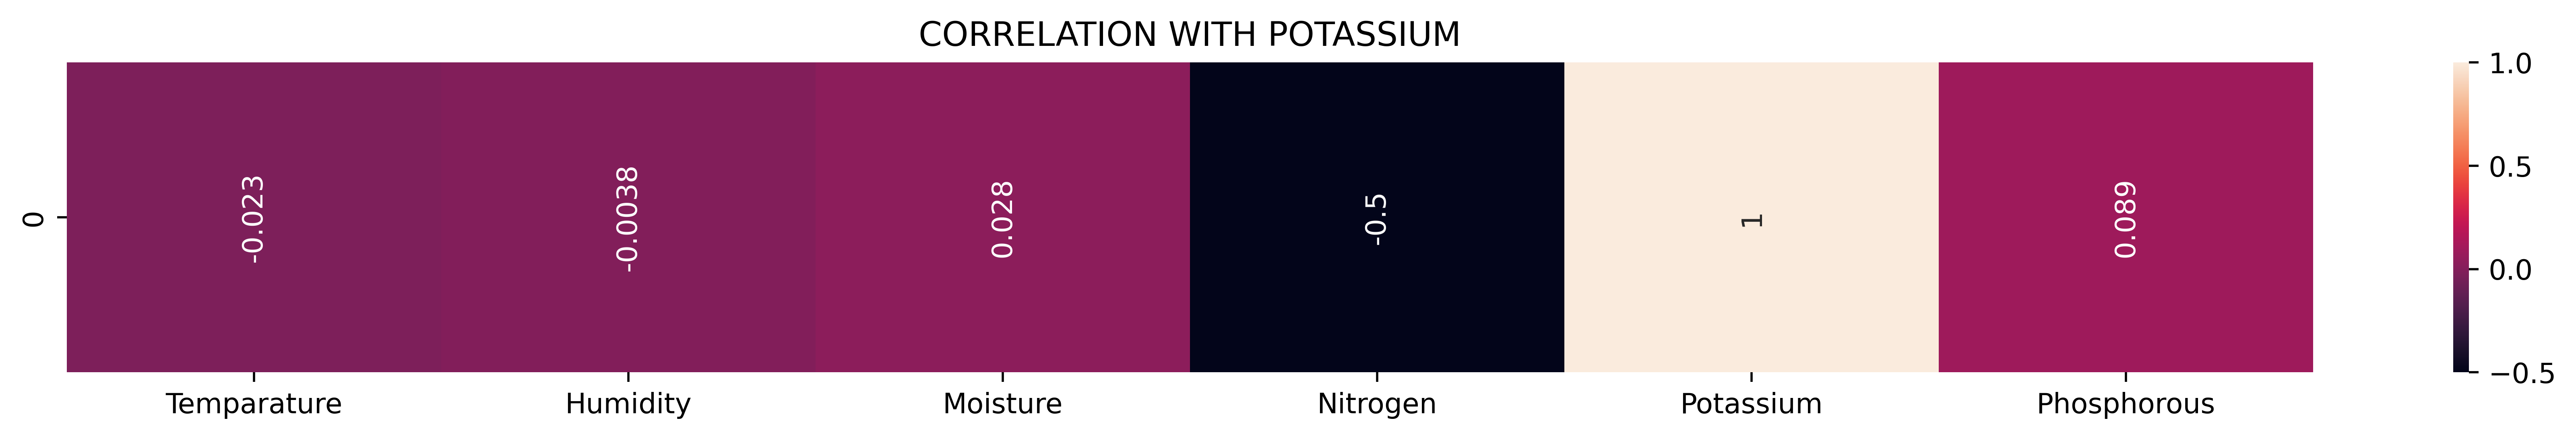

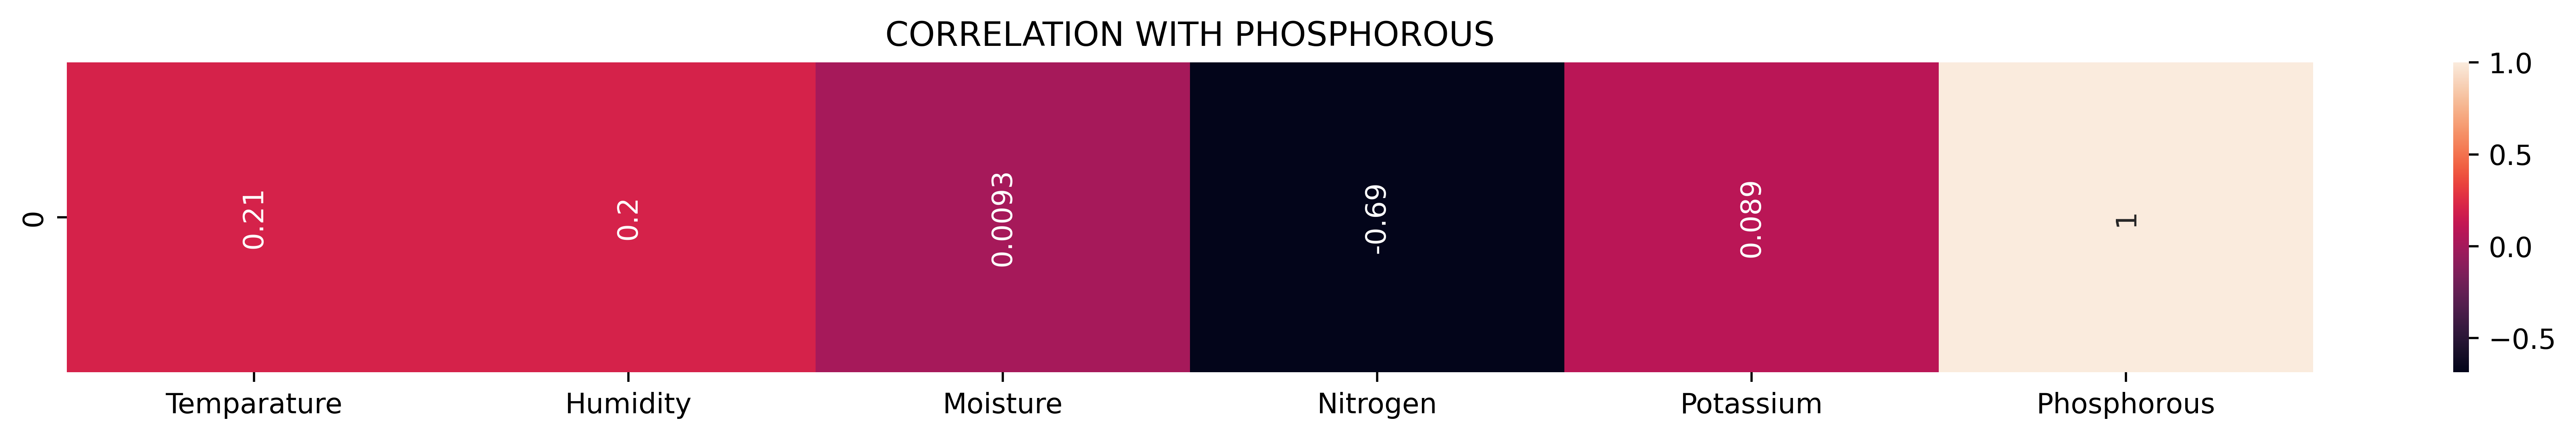

In [65]:
for i in train.select_dtypes(include=['number']):
    plt.figure(figsize=(18,2),dpi=500)
    corr=train.corrwith(train[i],numeric_only=True)
    corr=corr.to_frame().T
    sns.heatmap(corr,annot=True,annot_kws={"rotation": 90})
    plt.title(f"CORRELATION WITH {i.upper()}")
    plt.show()

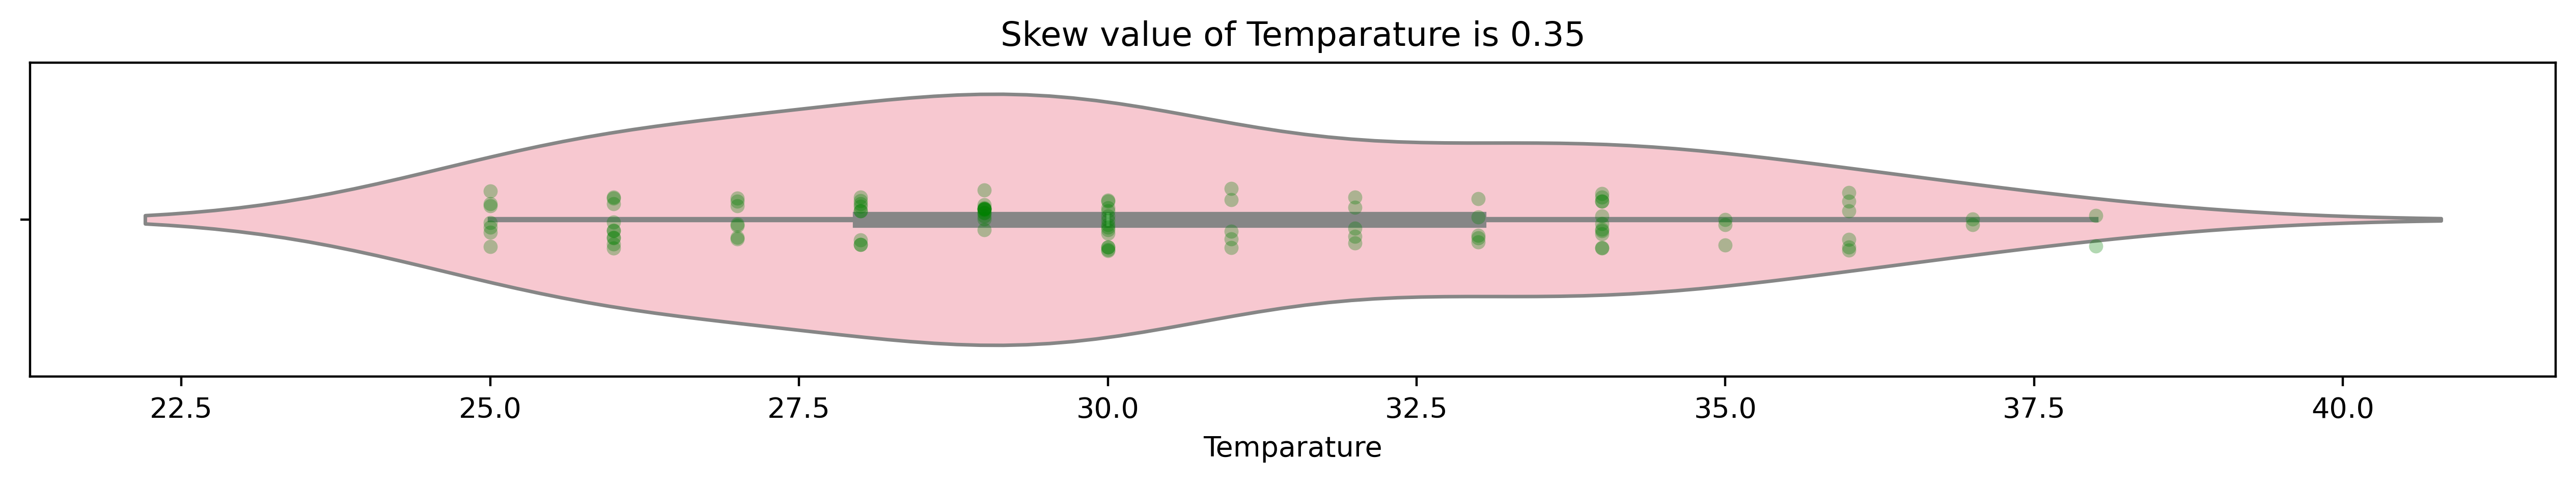

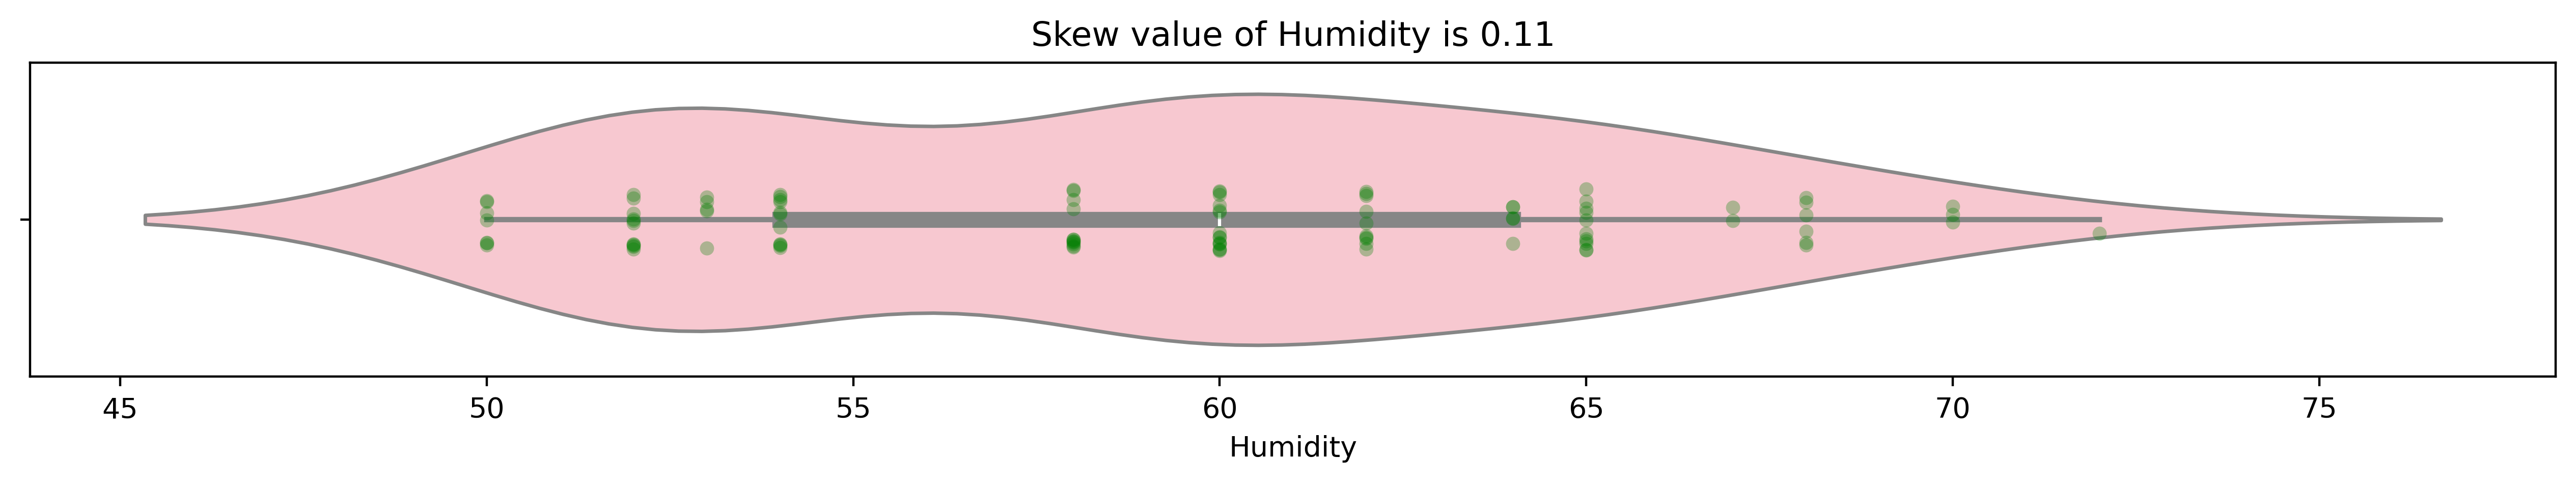

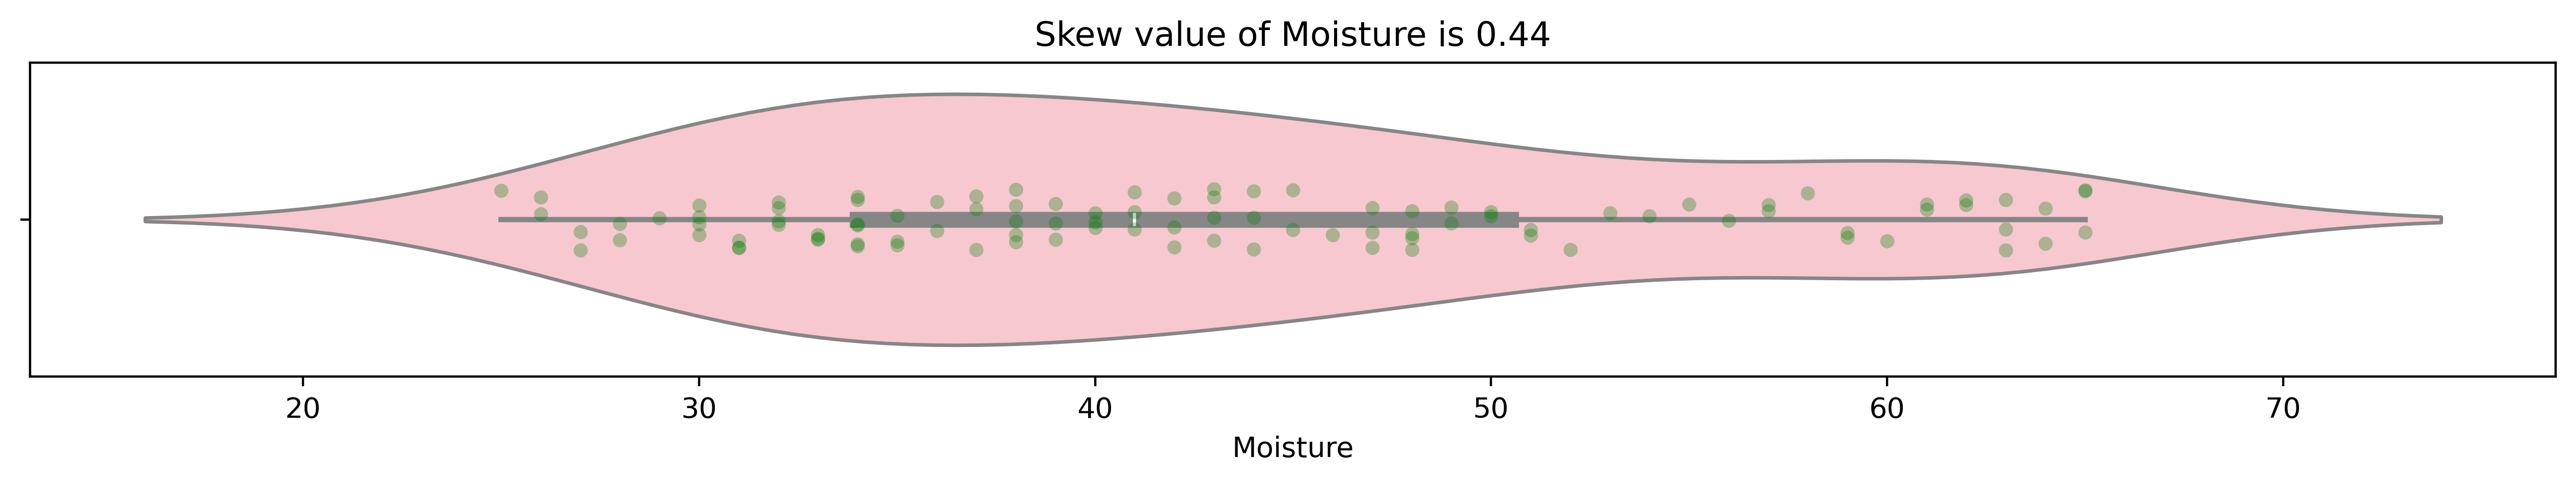

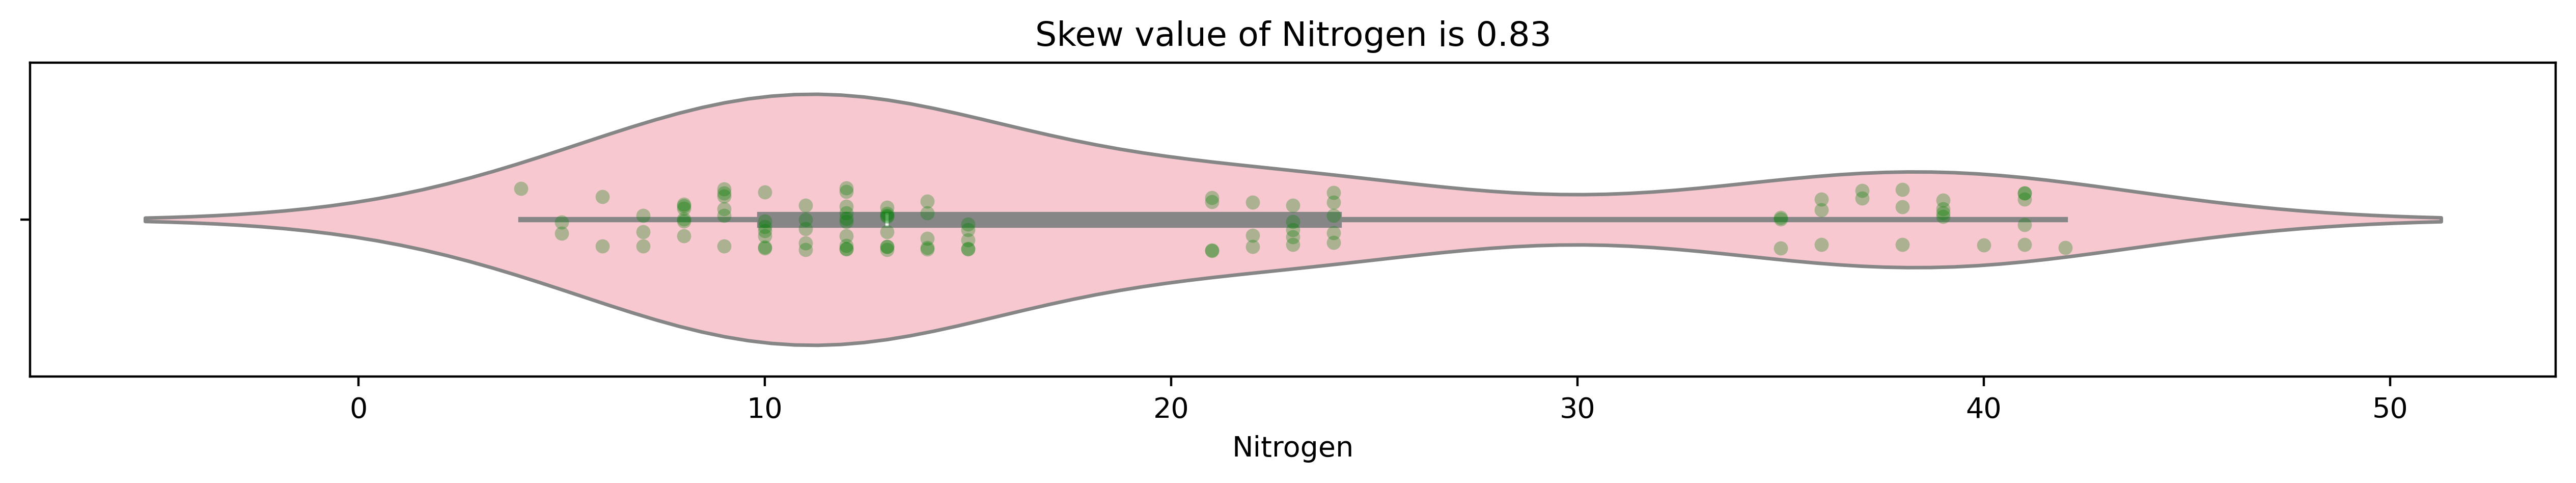

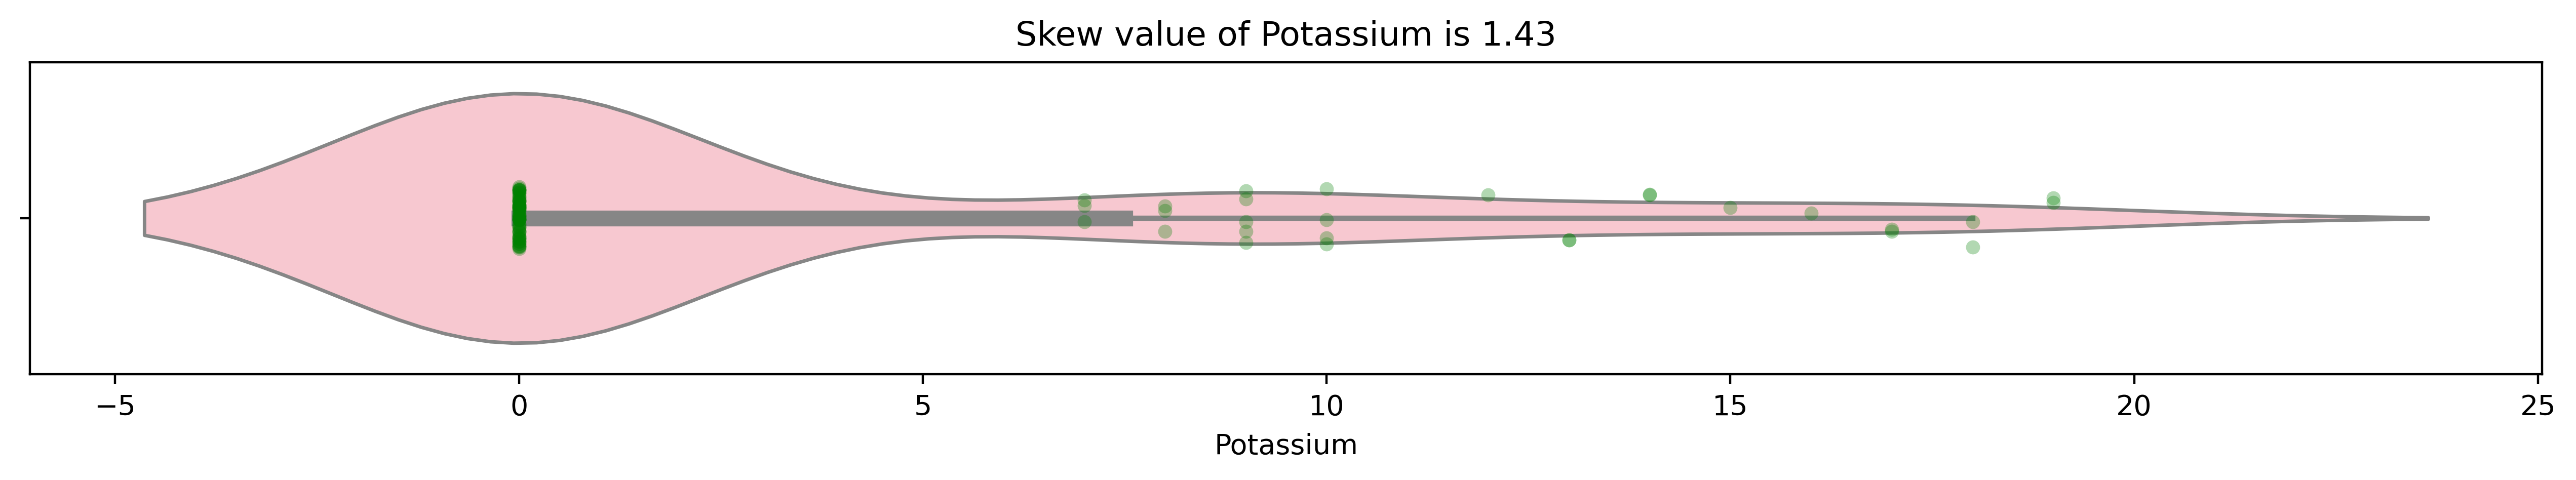

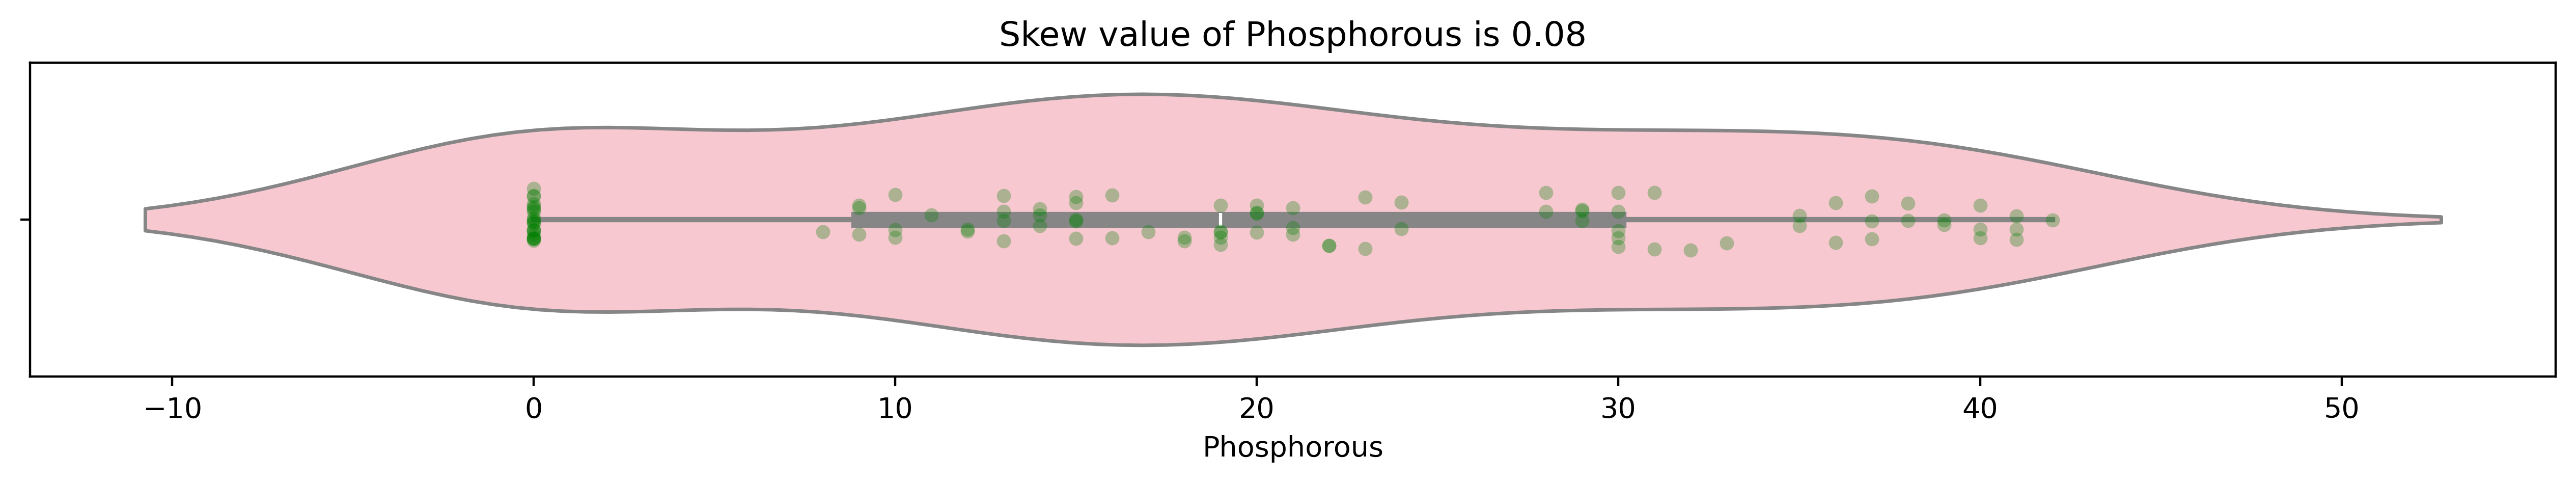

In [66]:
for i in train.select_dtypes(include=['number']):
    plt.figure(figsize=(16,2),dpi=400)
    sns.violinplot(x=train[i],color='pink')
    sns.stripplot(x=train[i],color='green',alpha=0.3)
    plt.title(f"Skew value of {i} is {train[i].skew().round(2)}")

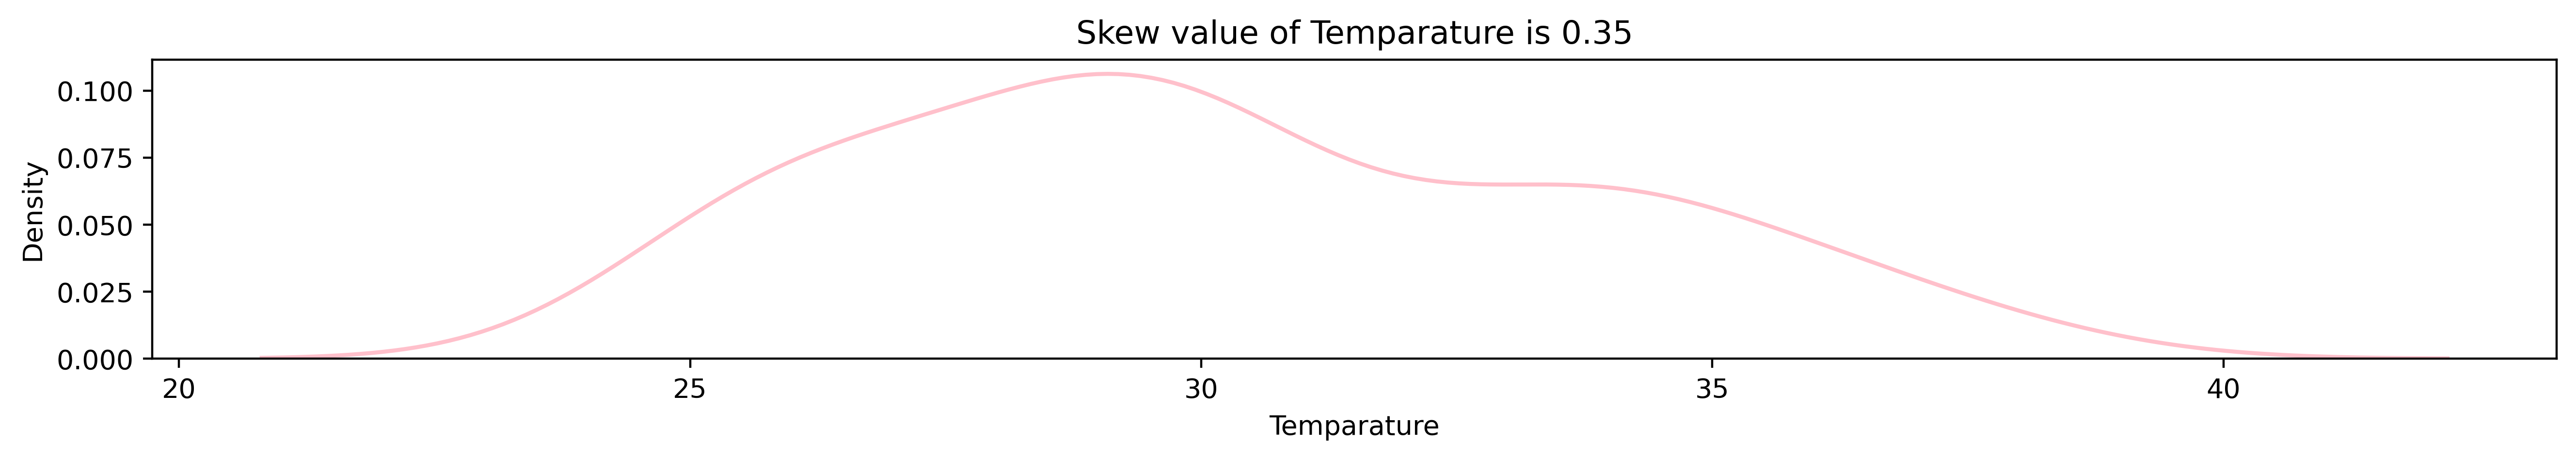

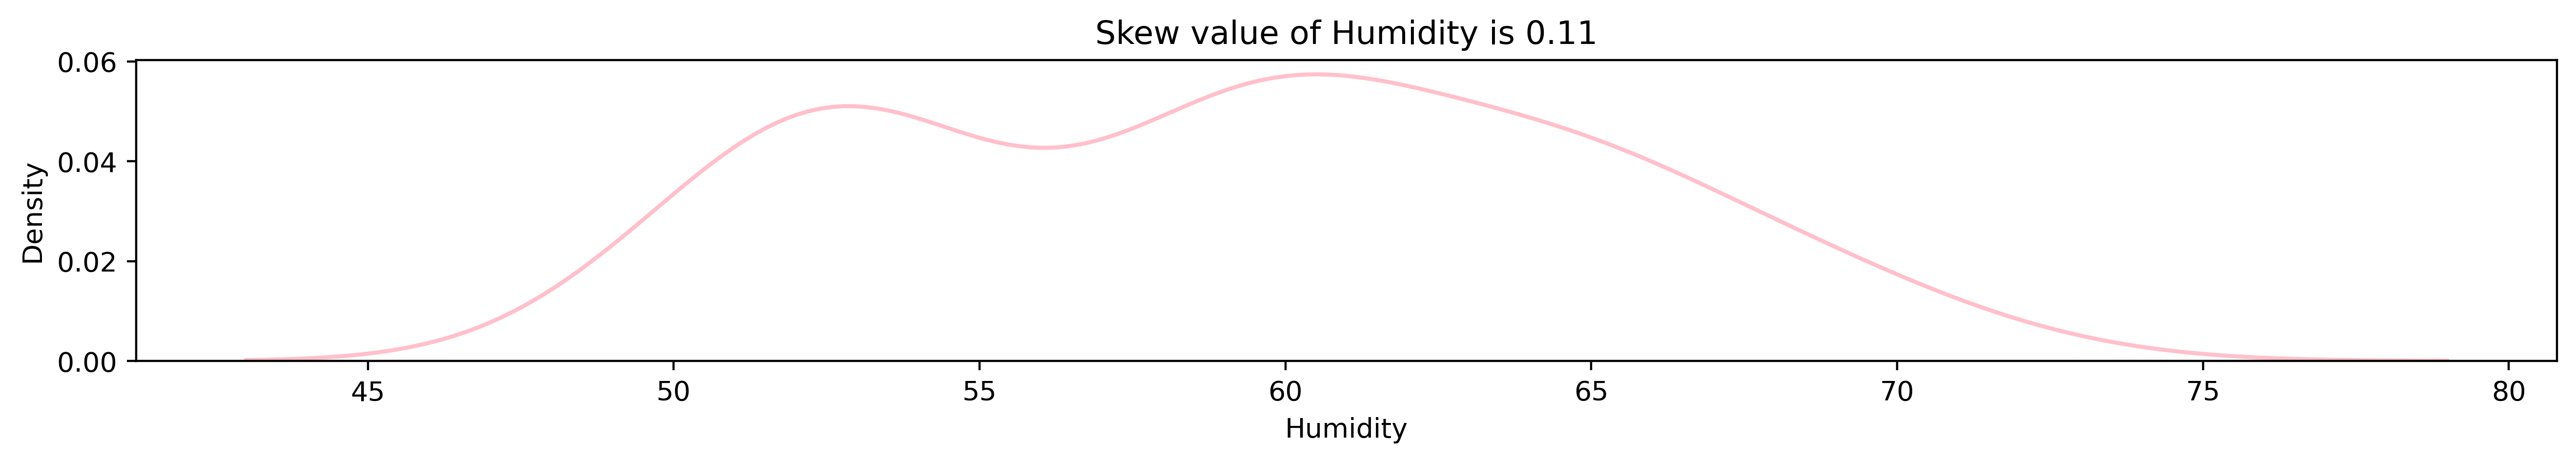

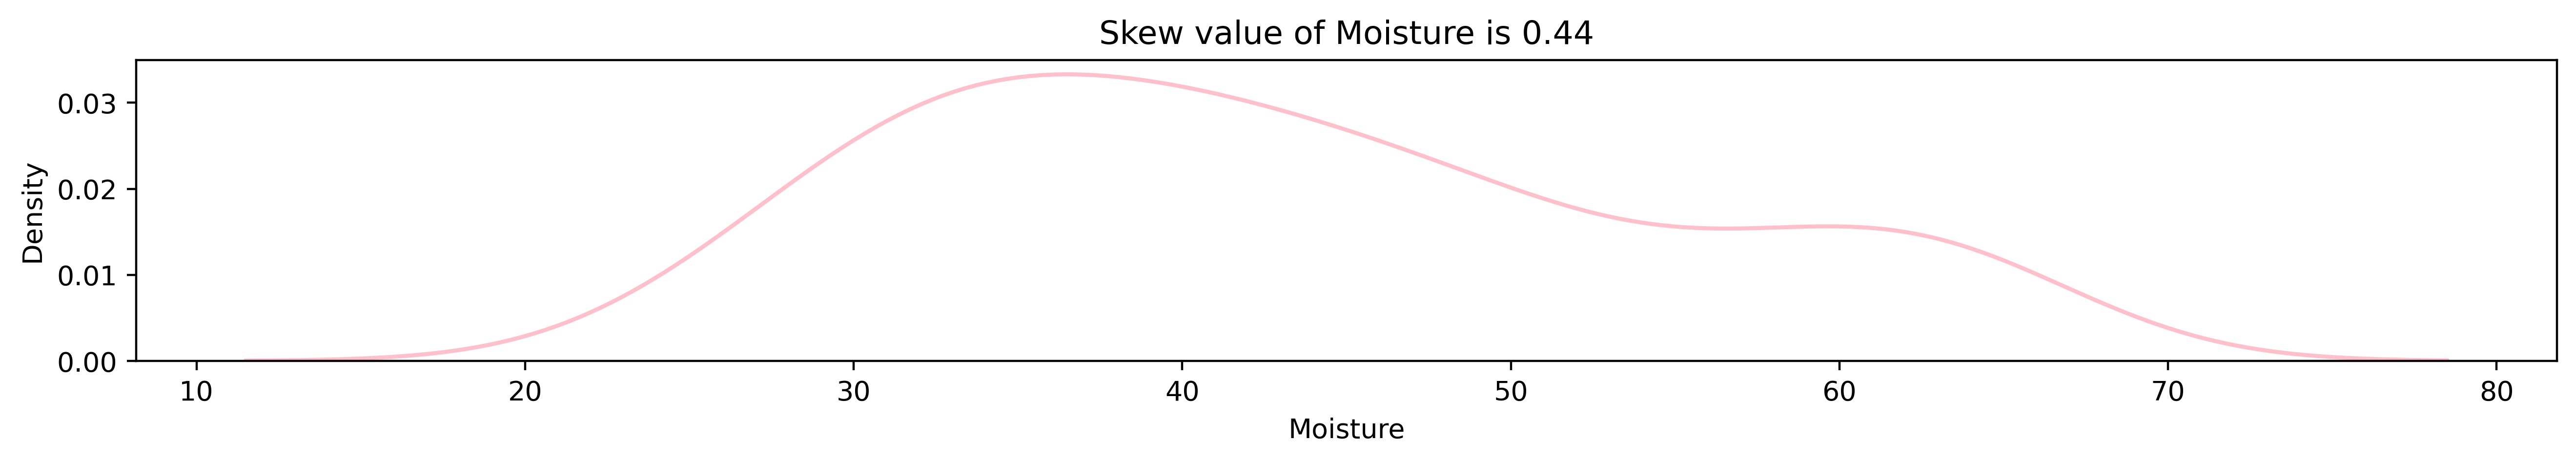

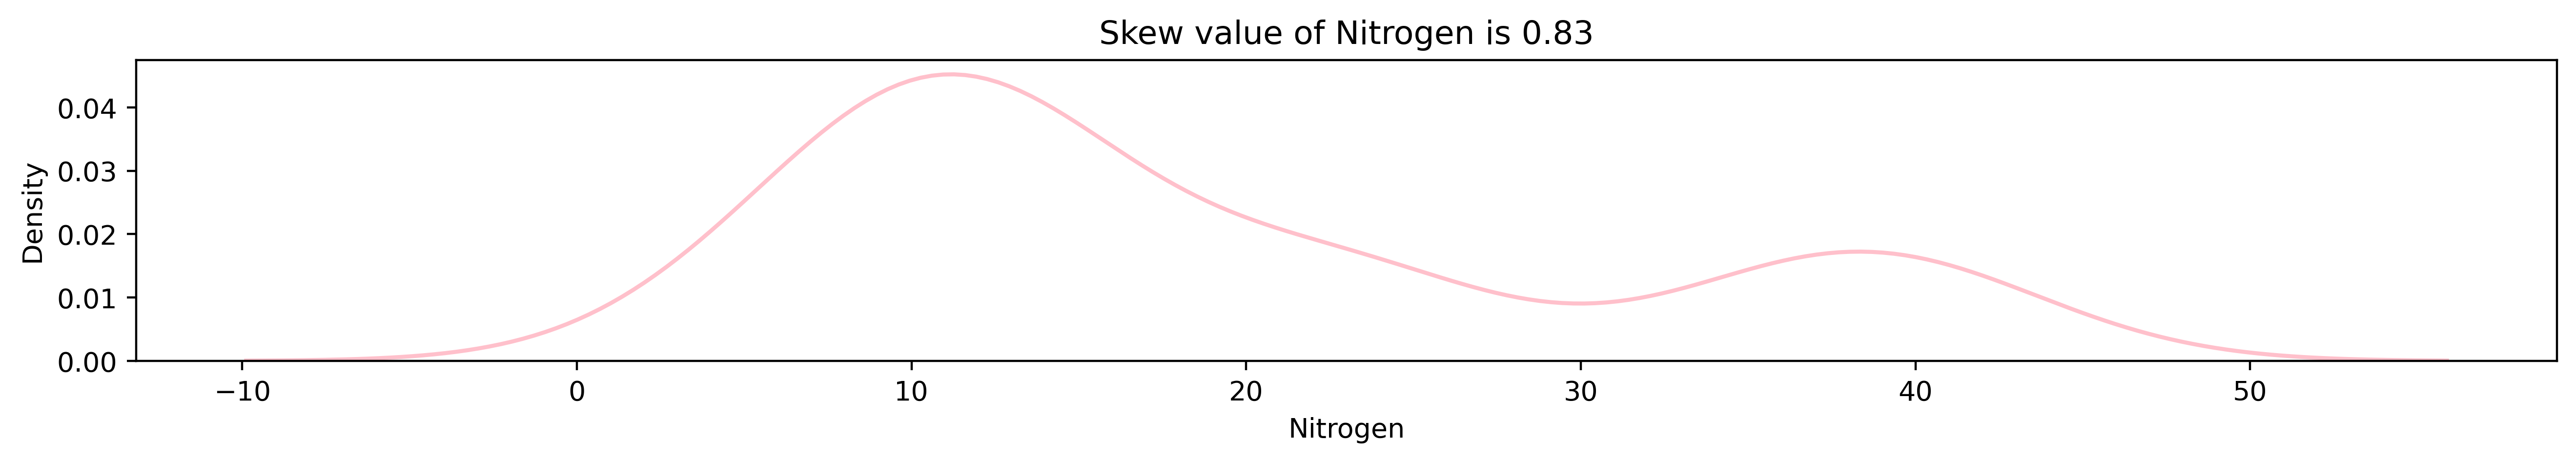

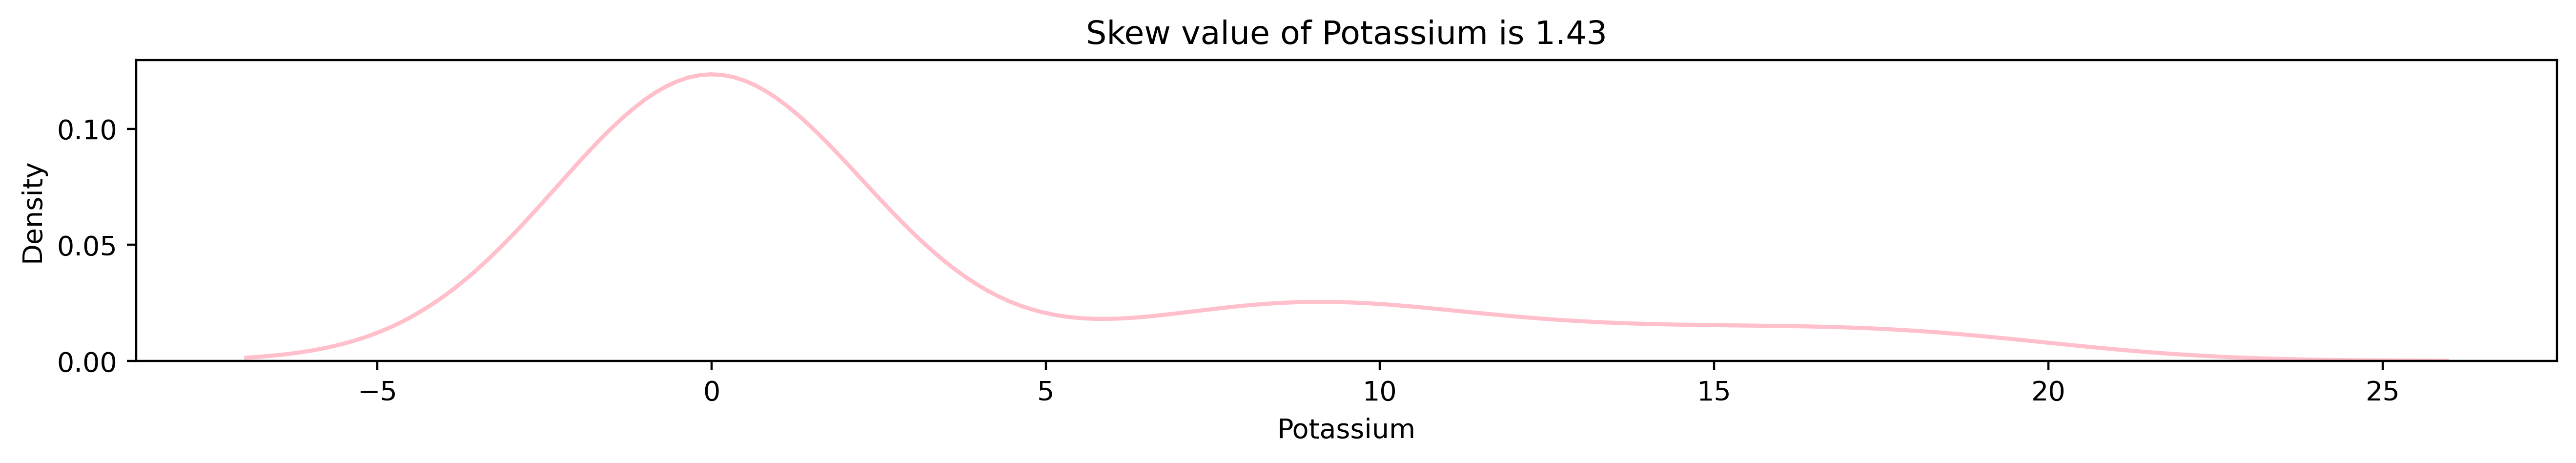

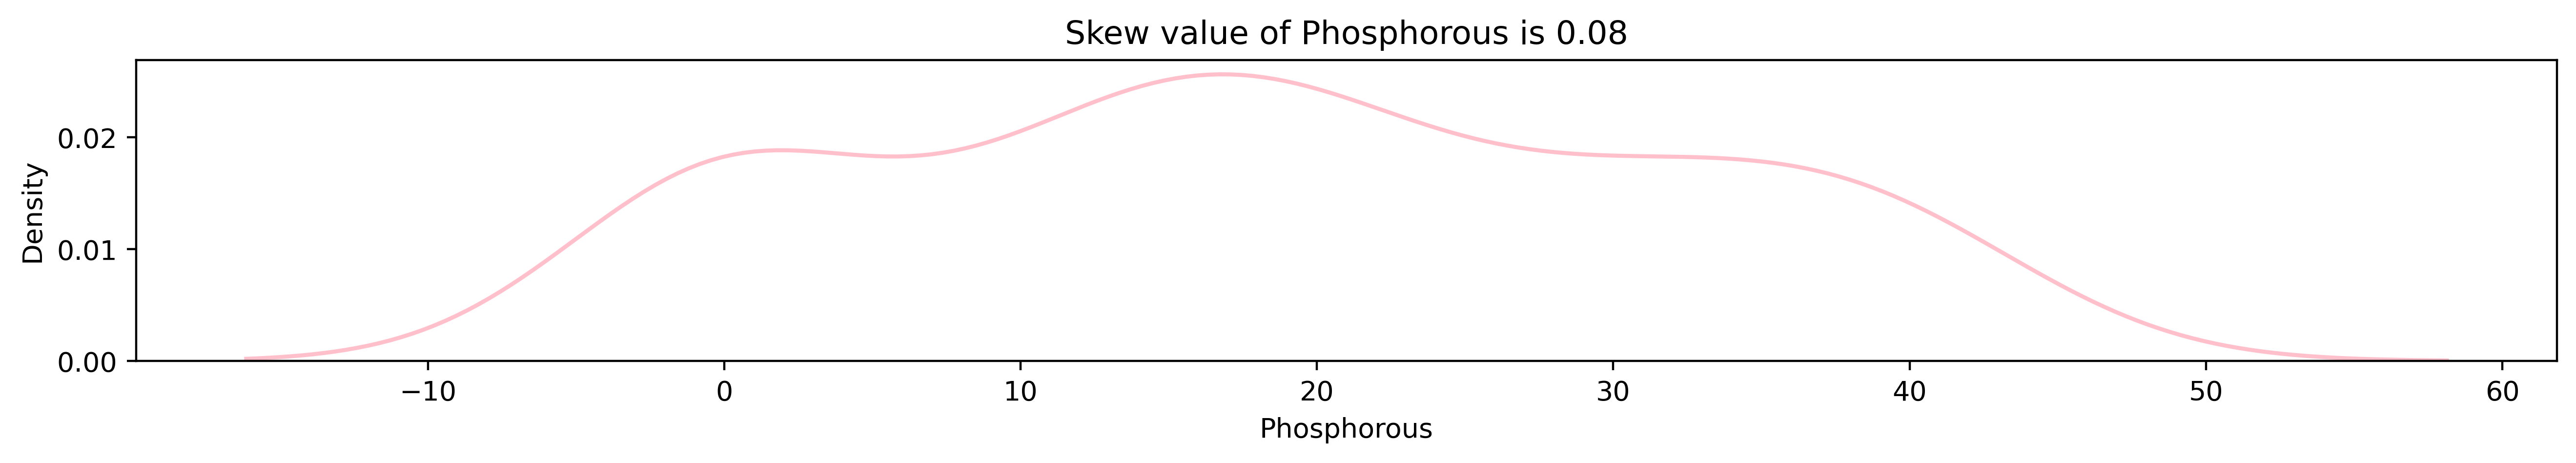

In [67]:
for i in train.select_dtypes(include=['number']):
    plt.figure(figsize=(16,2),dpi=400)
    sns.kdeplot(x=train[i],color='pink')
    plt.title(f"Skew value of {i} is {train[i].skew().round(2)}")

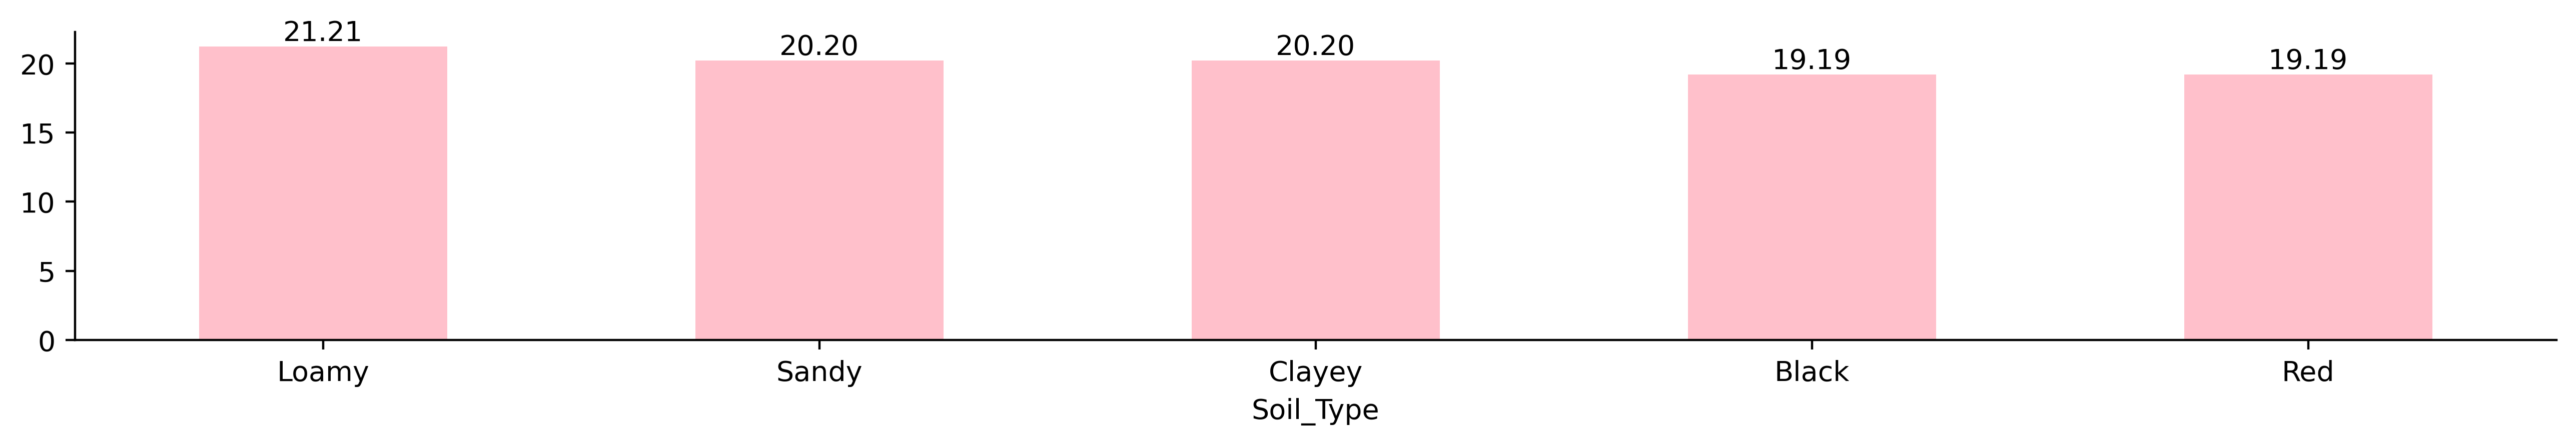

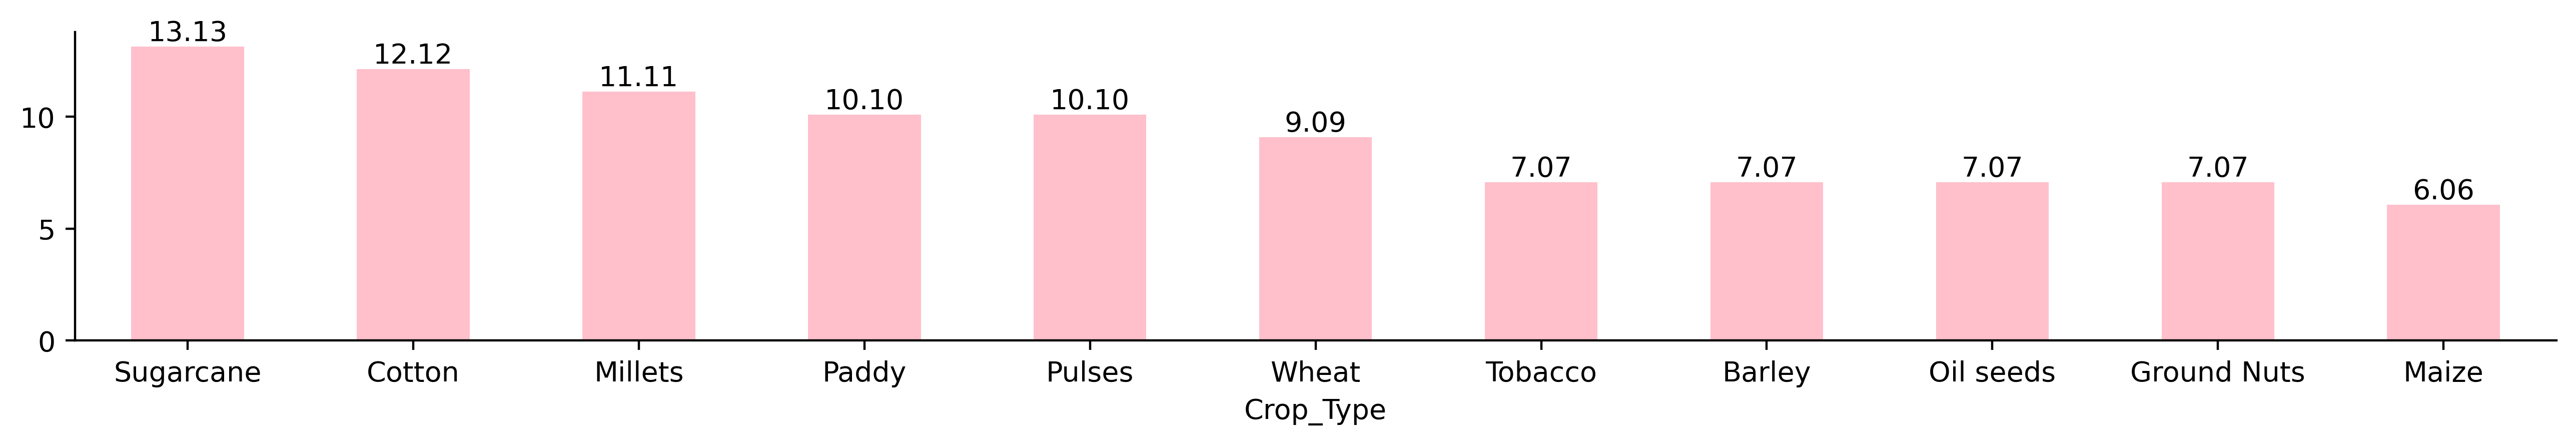

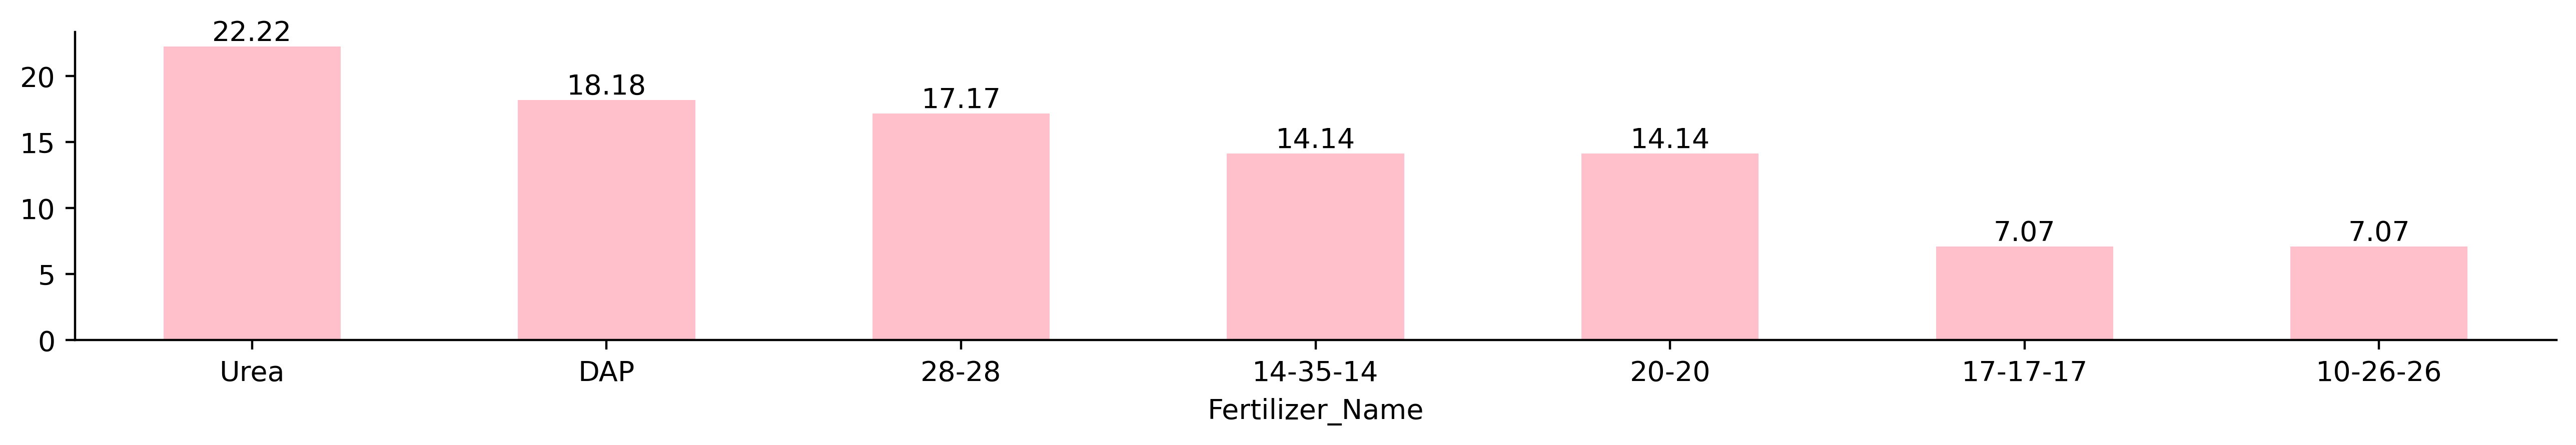

In [68]:
for i in train.select_dtypes(exclude=['number']):
    plt.figure(figsize=(16,2),dpi=400)
    ax=((train[i].value_counts()/train[i].shape[0])*100).plot(kind='bar',color='pink')
    for i in ax.containers:
        ax.bar_label(i,fmt='%.2f')
    axes=plt.gca()
    axes.spines['top'].set_visible(False)
    axes.spines['right'].set_visible(False)
    plt.xticks(rotation=0)

<Axes: xlabel='Temparature', ylabel='Humidity'>

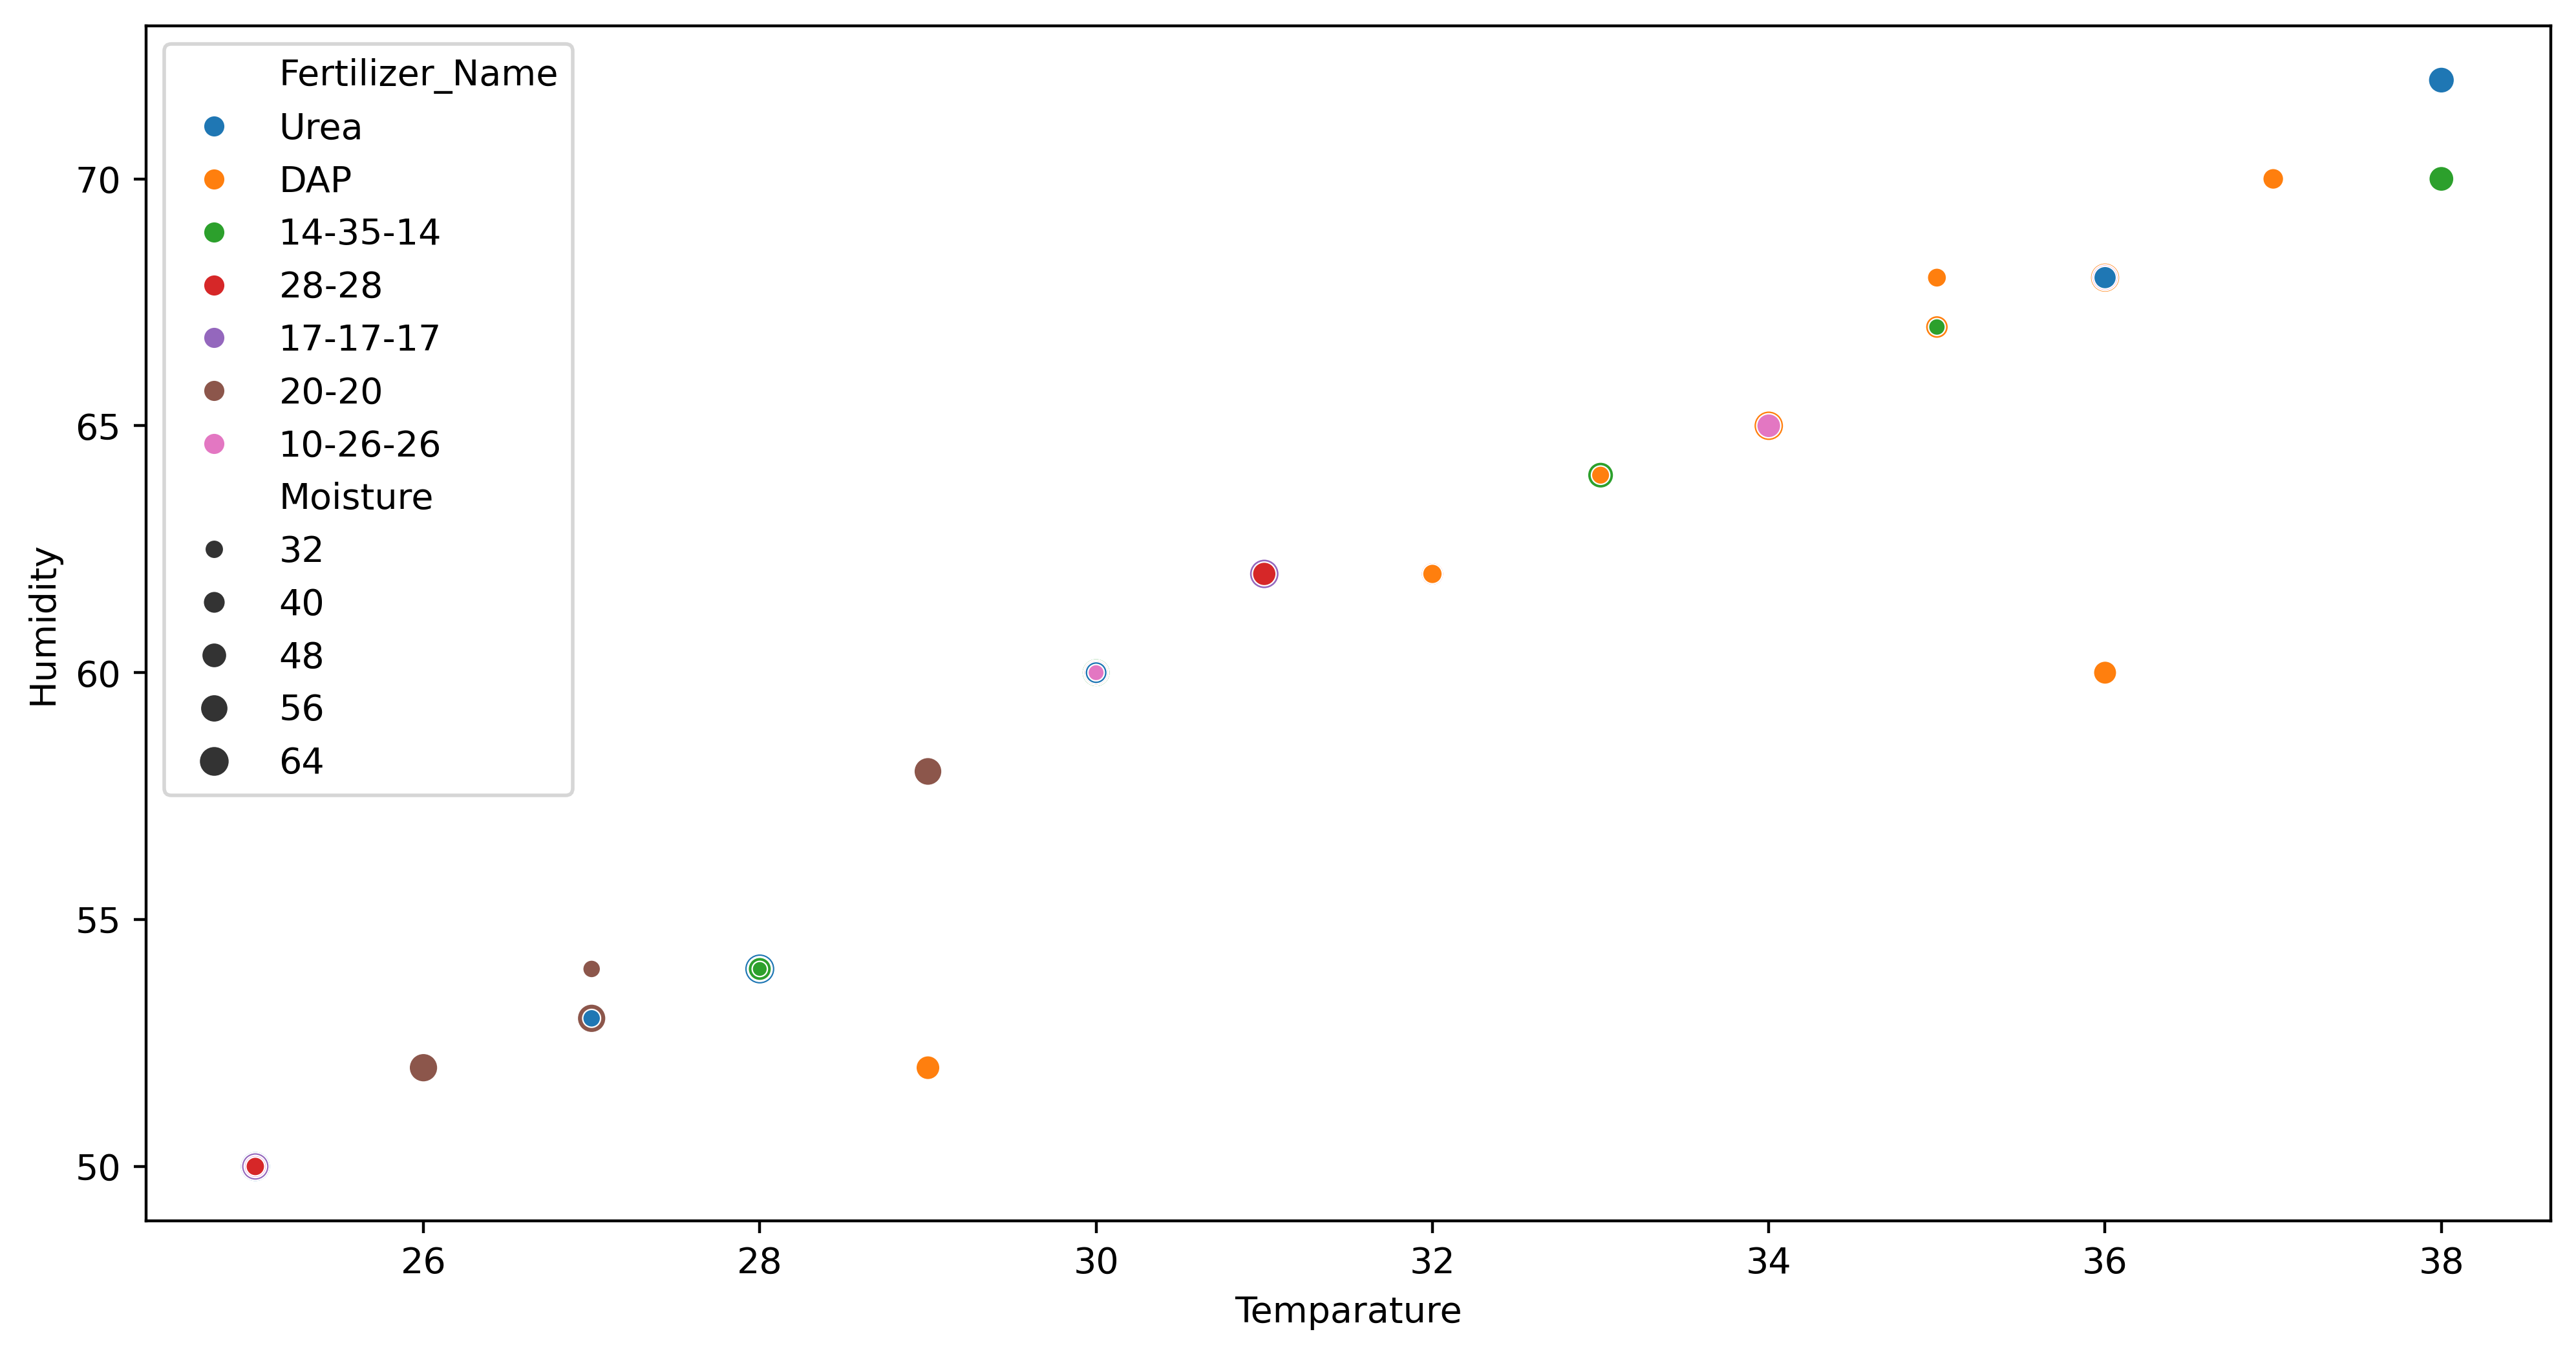

In [70]:
plt.figure(figsize=(12,6),dpi=400)
sns.scatterplot(x=train["Temparature"],y=train["Humidity"],size=train['Moisture'],hue=train['Fertilizer_Name'])

<Axes: xlabel='Phosphorous', ylabel='Nitrogen'>

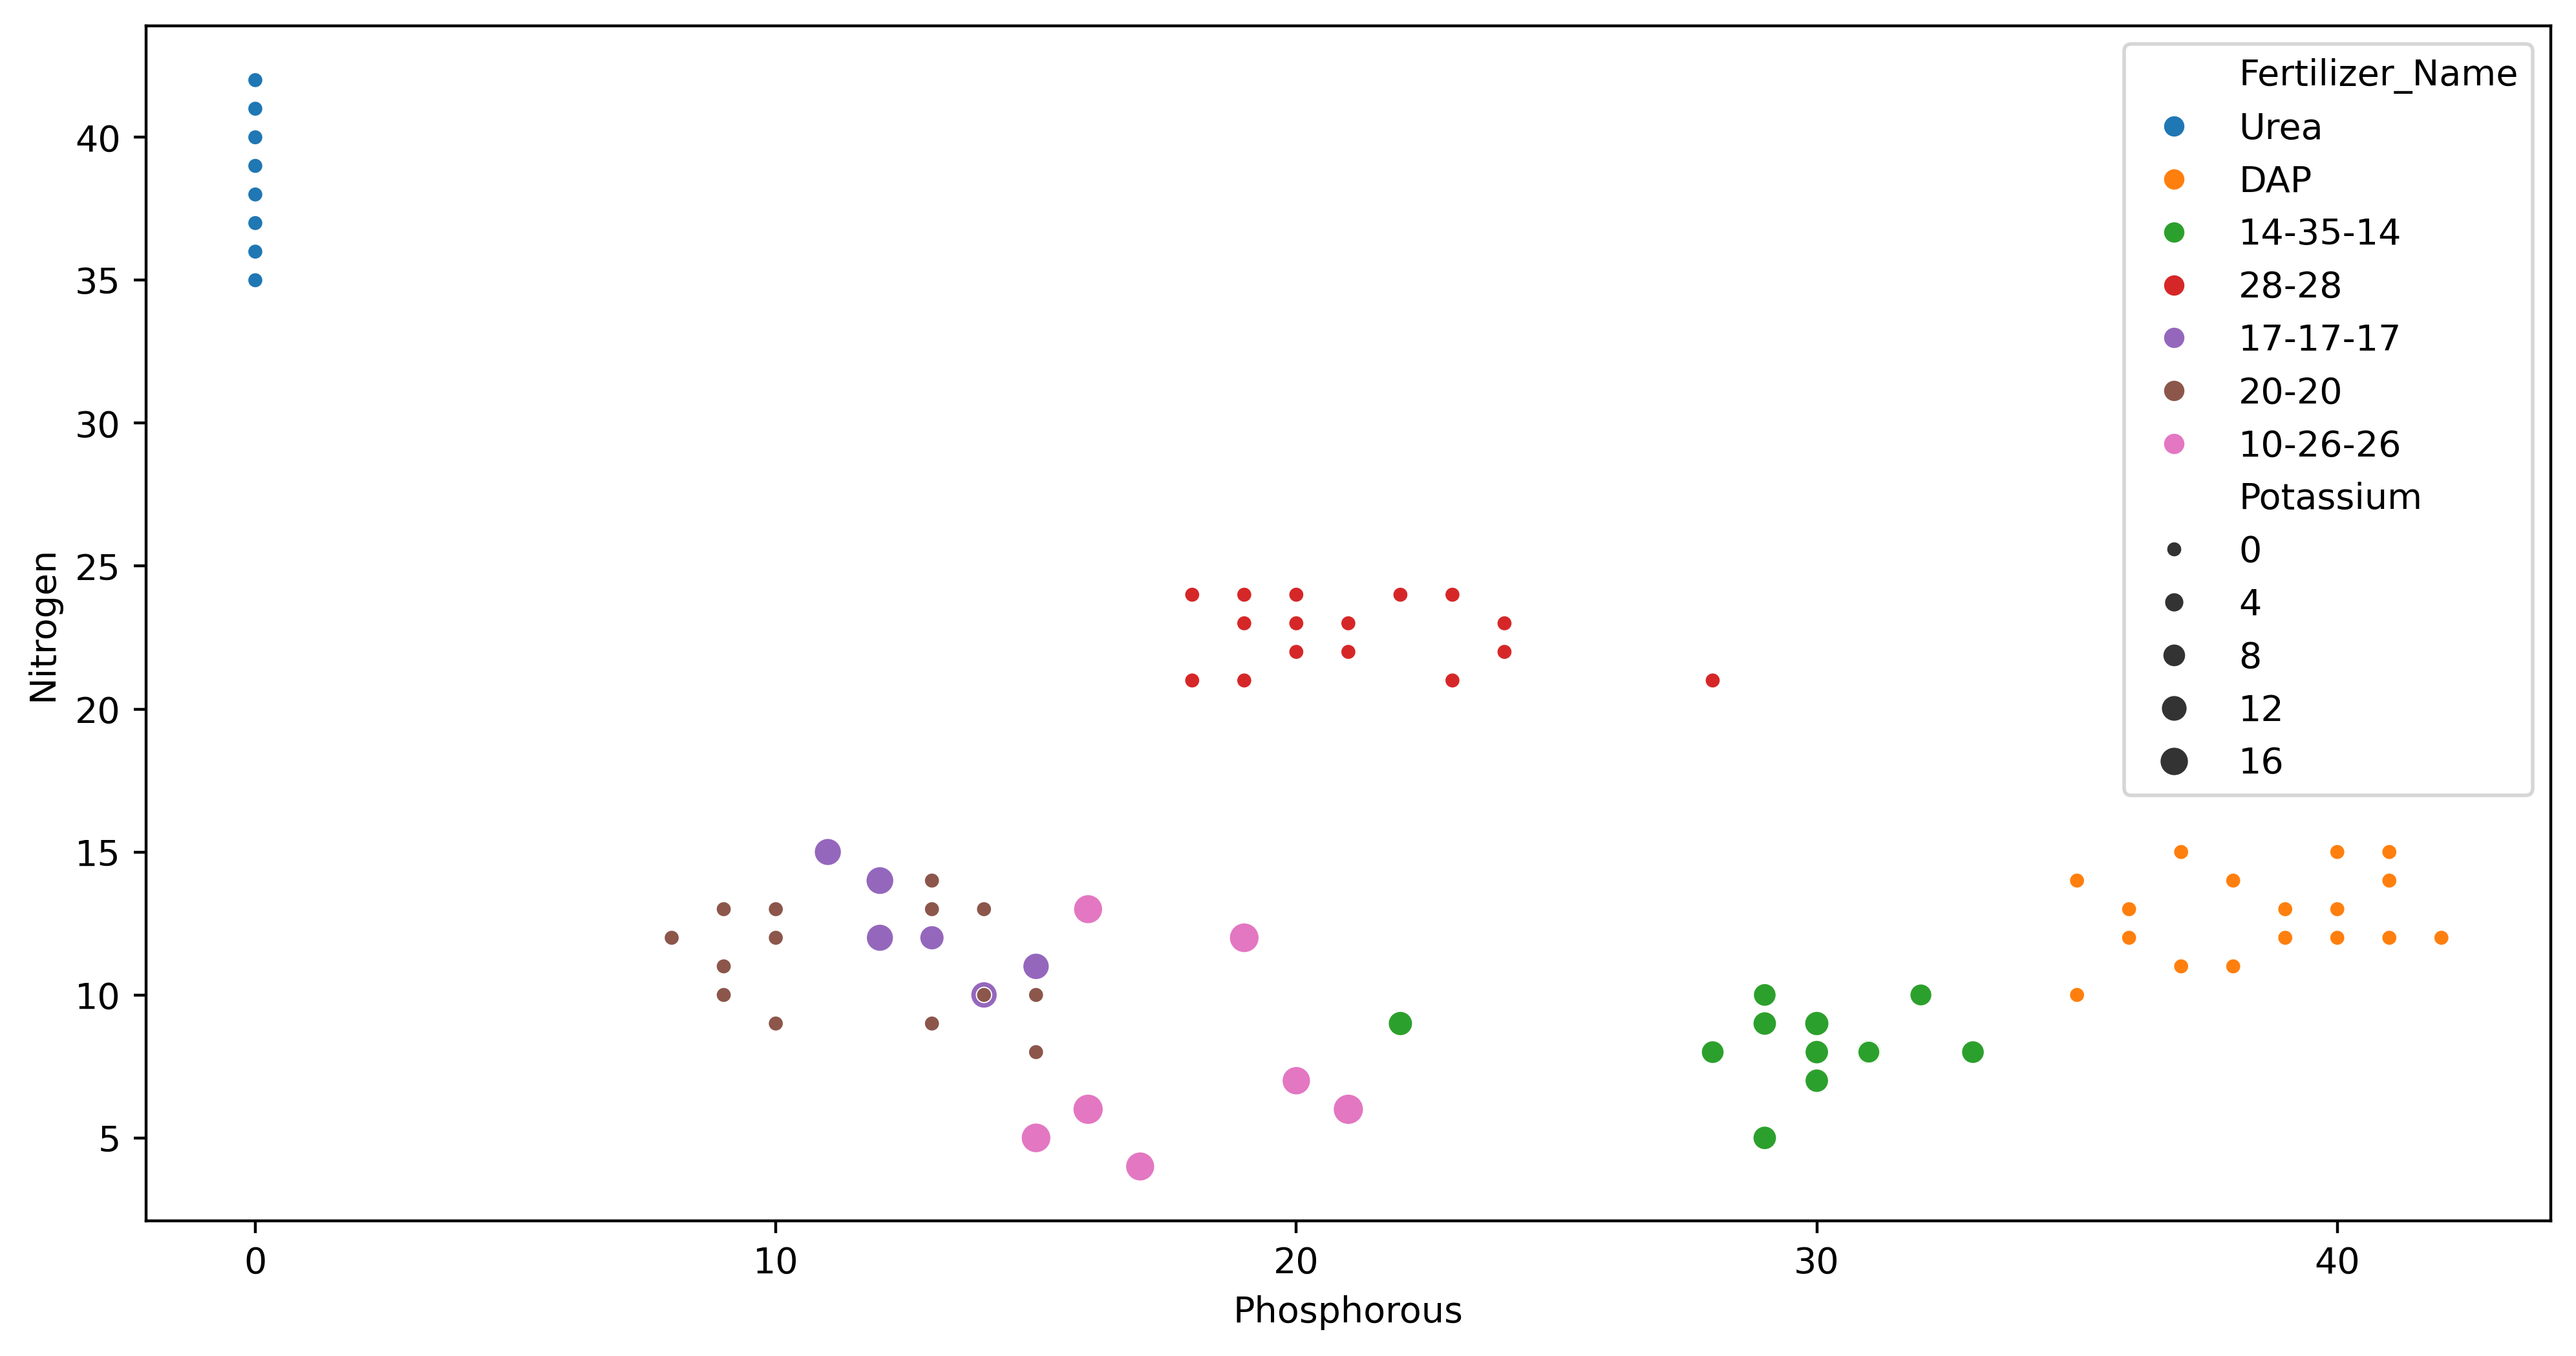

In [71]:
plt.figure(figsize=(12,6),dpi=400)
sns.scatterplot(y=train["Nitrogen"],size=train["Potassium"],x=train['Phosphorous'],hue=train['Fertilizer_Name'])

## Model

In [72]:
nums=[]
cat=[]
for i in train.columns:
    if i is pd.api.types.is_numeric_dtype(i):
        nums.append(i)
    else:
        cat.append(i)
    
    

In [73]:
cat.remove("Fertilizer_Name")

In [74]:
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder,FunctionTransformer,OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score,auc,f1_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier

In [75]:
numerical=make_pipeline(
    StandardScaler()
)
Categorical=make_pipeline(
    OneHotEncoder(handle_unknown='ignore')
)

In [76]:
preprocess=ColumnTransformer([
    ("num",numerical,nums),
    ("cat",Categorical,cat)
])

In [77]:
pipeline=Pipeline([
    ("preprocess",preprocess),
    ("model",RandomForestClassifier())
])

In [78]:
train.columns

Index(['Temparature', 'Humidity', 'Moisture', 'Soil_Type', 'Crop_Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer_Name'],
      dtype='object')

In [79]:
#train.rename(columns={'Fertilizer Name': 'Fertilizer_Name'}, inplace=True)

In [80]:
X=train.drop(["Fertilizer_Name"],axis=1)
y=train["Fertilizer_Name"]

In [81]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42,stratify=y)

In [83]:
X_train.columns

Index(['Temparature', 'Humidity', 'Moisture', 'Soil_Type', 'Crop_Type',
       'Nitrogen', 'Potassium', 'Phosphorous'],
      dtype='object')

In [84]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  []),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Temparature', 'Humidity',
                                                   'Moisture', 'Soil_Type',
                                                   'Crop_Type', 'Nitrogen',
                                                   'Potassium',
                                                   'Phosphorous'])])),
                ('model', RandomForestClassifier())])

In [85]:
y_hat=pipeline.predict(X_test)

In [86]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         1
    14-35-14       1.00      1.00      1.00         3
    17-17-17       1.00      1.00      1.00         1
       20-20       1.00      0.33      0.50         3
       28-28       0.75      1.00      0.86         3
         DAP       0.60      0.75      0.67         4
        Urea       1.00      1.00      1.00         5

    accuracy                           0.85        20
   macro avg       0.91      0.87      0.86        20
weighted avg       0.88      0.85      0.84        20



In [87]:
probabilities=pipeline.predict_proba(X_test)

In [88]:
#y_hat=pipeline.decision_function(X_test)

In [89]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [90]:
#probabilities = sigmoid(y_hat)

In [91]:
le = LabelEncoder()
y_encoded = le.fit_transform(y_test)

In [92]:
from sklearn.preprocessing import label_binarize
y_test_one_hot = label_binarize(y_encoded, classes=[0, 1, 2, 3, 4, 5,6])

In [93]:
roc_score=roc_auc_score(y_test_one_hot,probabilities)

In [94]:
roc_score

0.9879639355742297

In [95]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr={}
tpr={}
roc_auc={}
for i in range(7):
    fpr[i], tpr[i],_= roc_curve(y_test_one_hot[:, i], probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

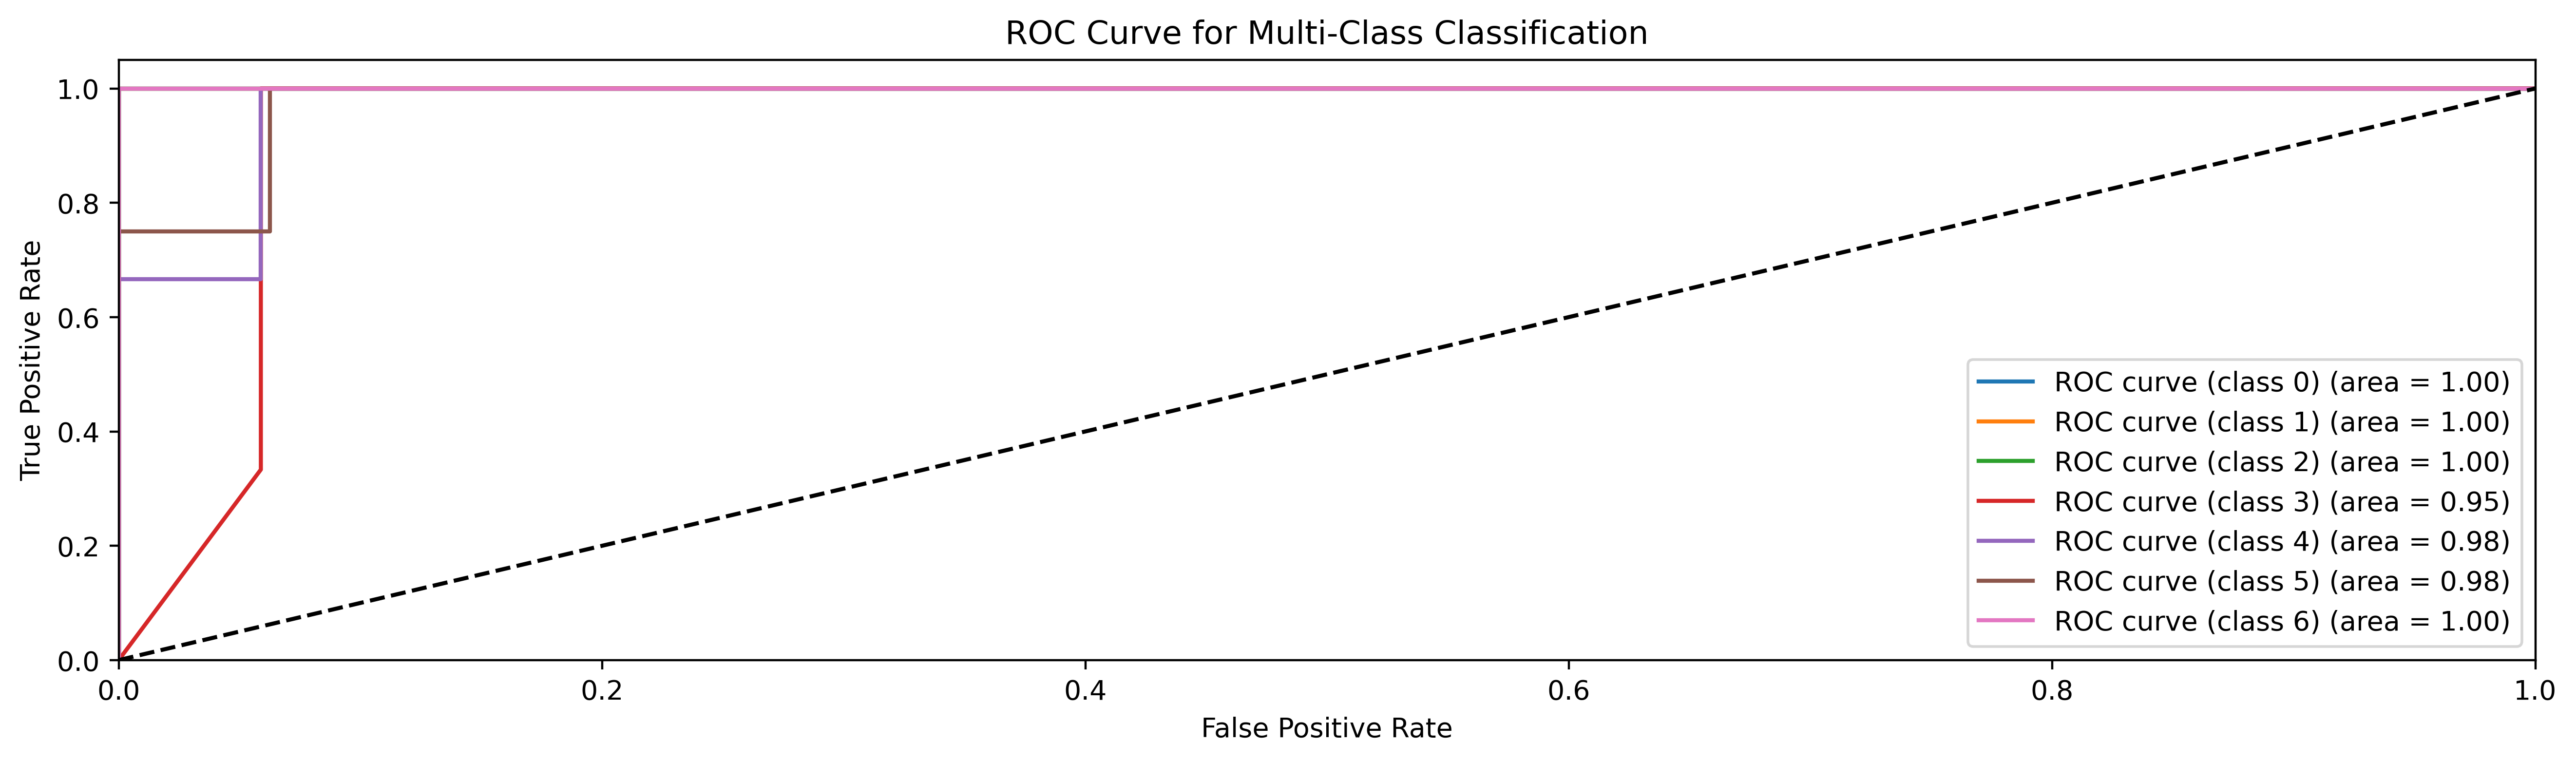

In [96]:

plt.figure(figsize=(16,4),dpi=400)
for i in range(7):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}) (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc="lower right")
plt.show()

In [97]:
import joblib

In [98]:
joblib.dump(pipeline,"model.joblib")

['model.joblib']

In [99]:
saved_model=joblib.load("model.joblib")
saved_model

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  []),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Temparature', 'Humidity',
                                                   'Moisture', 'Soil_Type',
                                                   'Crop_Type', 'Nitrogen',
                                                   'Potassium',
                                                   'Phosphorous'])])),
                ('model', RandomForestClassifier())])